### Student Information
Name: 白宗翰

Student ID: 110048138

GitHub ID: HummerQAQ

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__.

In [63]:
### Begin Assignment Here

## FIRST : Take Home Exercises in the [DM2024-Lab1-Master]

In [64]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [65]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42) 
#This command also shuffles the data randomly, but with random_state we can bring the same distribution of data everytime 
#if we choose the same number, in this case "42". This is good for us, it means we can reproduce the same results every time
#we want to run the code.

In [66]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [67]:
# add category to the dataframe
X['category'] = twenty_train.target

In [68]:
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### **>>> Exercise 2 (take home):** 

1. First querying technique: Filtering by Conditions

In [82]:
# Select the rows that have category_name as 'comp.graphics' or 'sci.med'
X[(X['category_name'] == 'comp.graphics') | (X['category_name'] == 'sci.med')]

text  category  \
0     From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
7     From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8     From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9     From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   
...                                                 ...       ...   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   

      category_name  
0     comp.graphics  
1     comp.graphics  
7           sci.med  
8           sci.med  
9           sci.med  
...             ...  
2252        sci.med  
2253        sci.med  
2254        sci.med  
2255        sci.med  
2256        sci.med  

[1178 rows x 3 columns]

In [ ]:
# Looking for the word 'image' in the text column of the dataframe X
X[X['text'].str.contains('image', case=False, na=False)]

text  category  \
0     From: sd345@city.ac.uk (Michael Collier) Subje...         1   
13    Subject: So what is Maddi? From: madhaus@netco...         0   
14    From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...         1   
39    From: g9134255@wampyr.cc.uow.edu.au (Coronado ...         1   
50    From: ab@nova.cc.purdue.edu (Allen B) Subject:...         1   
...                                                 ...       ...   
2209  From: bbenowit@telesciences.com (Barry D Benow...         2   
2210  From: edimg@willard.atl.ga.us (Ed pimentel) Su...         1   
2214  From: tychay@cco.caltech.edu (Terrence Y. Chay...         1   
2226  From: nahess@mir.gatech.edu (Nicholas A. Hess)...         1   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2   

      category_name  
0     comp.graphics  
13      alt.atheism  
14    comp.graphics  
39    comp.graphics  
50    comp.graphics  
...             ...  
2209        sci.med  
2210  comp.graphics  
2214  comp.graphics  
2226  comp.graphics  
2253        sci.med  

[171 rows x 3 columns]

2. Second querying technique: .query() method

In [84]:
# Select the rows that have category_name as 'sci.med'
X.query('category_name == "sci.med"')

text  category  \
7     From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8     From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9     From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   
16    From: texx@ossi.com (Robert "Texx" Woodworth) ...         2   
28    From: rind@enterprise.bih.harvard.edu (David R...         2   
...                                                 ...       ...   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   

     category_name  
7          sci.med  
8          sci.med  
9          sci.med  
16         sci.med  
28         sci.med  
...            ...  
2252       sci.med  
2253       sci.med  
2254       sci.med  
2255       sci.med  
2256       sci.med  

[594 rows x 3 columns]

In [83]:
# Select the rows that have category_name as 'comp.graphics' and the text contains 'image'
X.query('category_name == "comp.graphics" and text.str.contains("image")')

text  category  \
0     From: sd345@city.ac.uk (Michael Collier) Subje...         1   
14    From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...         1   
39    From: g9134255@wampyr.cc.uow.edu.au (Coronado ...         1   
50    From: ab@nova.cc.purdue.edu (Allen B) Subject:...         1   
55    From: ken@cs.UAlberta.CA (Huisman Kenneth M) S...         1   
...                                                 ...       ...   
2162  From: michael_maier@qmgate.anl.gov (Michael Ma...         1   
2166  Subject: XLib and 24 Bit Displays [Info Needed...         1   
2189  From: schultz@schultz.kgn.ibm.com (Karl Schult...         1   
2210  From: edimg@willard.atl.ga.us (Ed pimentel) Su...         1   
2226  From: nahess@mir.gatech.edu (Nicholas A. Hess)...         1   

      category_name  
0     comp.graphics  
14    comp.graphics  
39    comp.graphics  
50    comp.graphics  
55    comp.graphics  
...             ...  
2162  comp.graphics  
2166  comp.graphics  
2189  comp.graphics  
2210  comp.graphics  
2226  comp.graphics  

[120 rows x 3 columns]

### **>>> Exercise 5 (take home):**

In [69]:
# Select the rows that have category_name as 'comp.graphics' or 'sci.med'
X[(X['category_name'] == 'comp.graphics') | (X['category_name'] == 'sci.med')]

text  category  \
0     From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
7     From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8     From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9     From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   
...                                                 ...       ...   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   

      category_name  
0     comp.graphics  
1     comp.graphics  
7           sci.med  
8           sci.med  
9           sci.med  
...             ...  
2252        sci.med  
2253        sci.med  
2254        sci.med  
2255        sci.med  
2256        sci.med  

[1178 rows x 3 columns]

In [70]:
# dummy record as dictionary format
dummy_dict = [{'text': 'dummy_record',
               'category': 1
              }]

In [71]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [72]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [73]:
X_sample = X.sample(n=1000) #random state

### >>> Exercise 6 (take home):

In [74]:
# Answer here
print("X size:", len(X))
print("X_sample size:", len(X_sample))

print("X index:", X.index[:5])
print("X_sample index:", X_sample.index[:5])

print("X all categories distribution:\n", X['category_name'].value_counts(normalize=True))
print("X_sample all categories distribution:\n", X_sample['category_name'].value_counts(normalize=True))

print("X first few rows:\n", X.head())
print("X_sample first few rows:\n", X_sample.head())

print

X size: 2257
X_sample size: 1000
X index: RangeIndex(start=0, stop=5, step=1)
X_sample index: Int64Index([822, 1259, 1157, 1560, 1324], dtype='int64')
X all categories distribution:
 soc.religion.christian    0.265397
sci.med                   0.263181
comp.graphics             0.258751
alt.atheism               0.212672
Name: category_name, dtype: float64
X_sample all categories distribution:
 comp.graphics             0.265
soc.religion.christian    0.256
sci.med                   0.254
alt.atheism               0.225
Name: category_name, dtype: float64
X first few rows:
                                                 text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   

            category_n

<function print>

### >>> **Exercise 8 (take home):** 

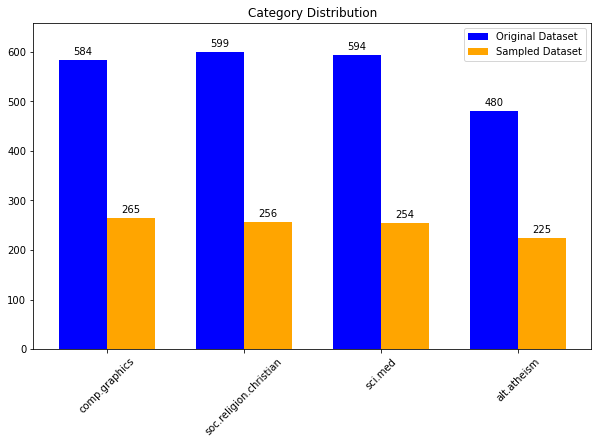

In [75]:
# Answer here
import matplotlib.pyplot as plt
import numpy as np

# get category names and their counts
categories = list(X.category_name.unique())
x_counts = [X[X.category_name == cat].shape[0] for cat in categories]
sample_counts = [X_sample[X_sample.category_name == cat].shape[0] for cat in categories]

# ser up the figure
x = np.arange(len(categories))
width = 0.35 

# create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# create the bars
rects1 = ax.bar(x - width/2, x_counts, width, label='Original Dataset', color='blue')
rects2 = ax.bar(x + width/2, sample_counts, width, label='Sampled Dataset', color='orange')

# dynamic range for ylim
max_count = max(max(x_counts), max(sample_counts))
ylim_max = int(max_count * 1.1)

#
ax.set_title('Category Distribution')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45)
ax.legend()
ax.set_ylim([0, ylim_max])

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{int(height)}',
                   xy=(rect.get_x() + rect.get_width() / 2, height),
                   xytext=(0, 3),
                   textcoords="offset points",
                   ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
plt.show()

In [76]:
import nltk
import nltk

nltk.download('punkt') 
nltk.download('averaged_perceptron_tagger') 
nltk.download('stopwords') 
nltk.download('wordnet')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('treebank')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/baizonghan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/baizonghan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/baizonghan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/baizonghan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/baizonghan/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/baizonghan/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package treebank to
[nltk_data]     /Users/ba

True

In [77]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts[0])

  (0, 14887)	1
  (0, 29022)	1
  (0, 8696)	4
  (0, 4017)	2
  (0, 33256)	2
  (0, 21661)	3
  (0, 9031)	3
  (0, 31077)	1
  (0, 9805)	2
  (0, 17366)	1
  (0, 32493)	4
  (0, 16916)	2
  (0, 19780)	2
  (0, 17302)	2
  (0, 23122)	1
  (0, 25663)	1
  (0, 16881)	1
  (0, 16082)	1
  (0, 23915)	1
  (0, 32142)	5
  (0, 33597)	2
  (0, 20253)	1
  (0, 587)	1
  (0, 12051)	1
  (0, 5201)	1
  :	:
  (0, 25361)	1
  (0, 25337)	1
  (0, 12833)	2
  (0, 5195)	1
  (0, 27836)	1
  (0, 18474)	1
  (0, 32270)	1
  (0, 9932)	1
  (0, 15837)	1
  (0, 32135)	1
  (0, 17556)	1
  (0, 4378)	1
  (0, 26175)	1
  (0, 9338)	1
  (0, 33572)	1
  (0, 31915)	1
  (0, 177)	2
  (0, 2326)	2
  (0, 3062)	1
  (0, 35416)	1
  (0, 20459)	1
  (0, 14085)	1
  (0, 3166)	1
  (0, 12541)	1
  (0, 230)	1


In [78]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

# tokenization, remove stop words (e.g i, a, the), create n-gram (or unigram)

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

### **>>> Exercise 10 (take home):**

In [79]:
# Answer here
fifth_record = X_counts[4].toarray()[0]

one_index = np.where(fifth_record == 1)[0]

second_one_index = one_index[1] # the first one is the category itself
word = count_vect.get_feature_names_out()[second_one_index]

print(f"The second '1' in the fifth record represents the word: '{word}'")

The second '1' in the fifth record represents the word: '01'


### **>>> Exercise 11 (take home):** 

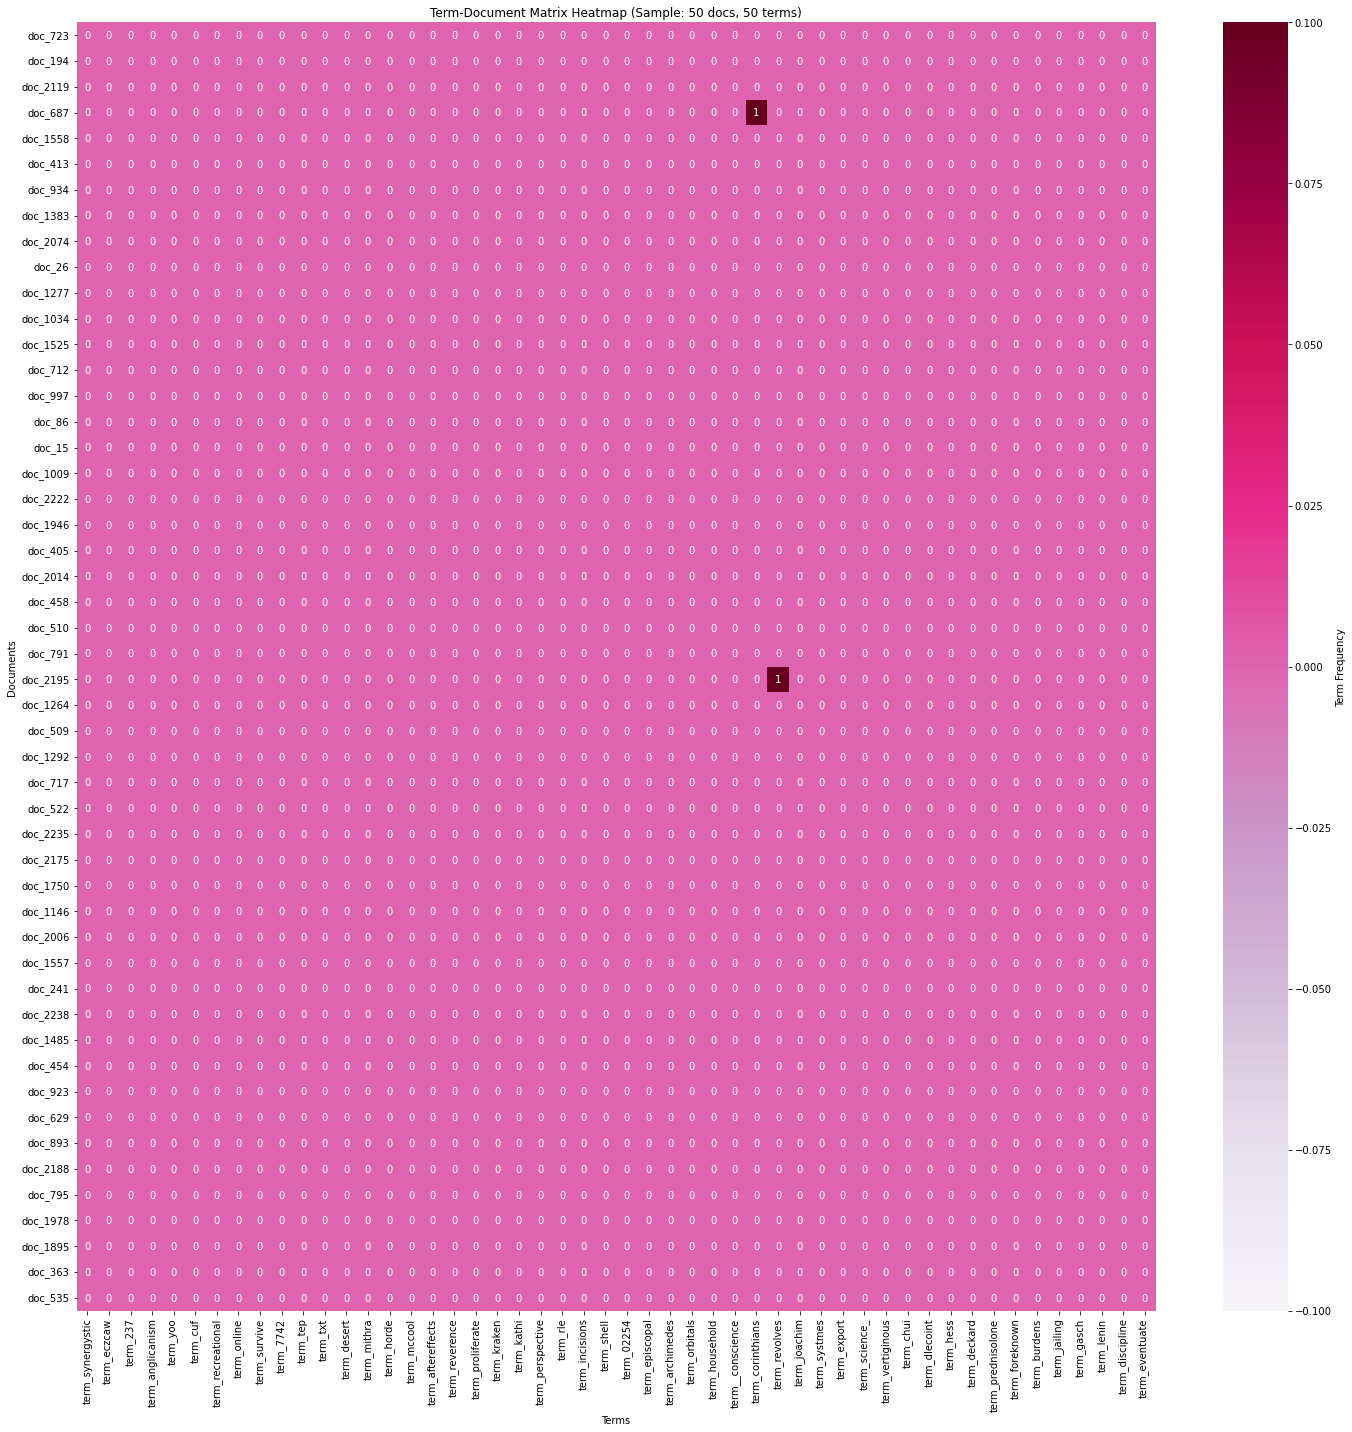

In [86]:
import seaborn as sns

def visualize_matrix(X_counts, count_vect, X, n_docs=50, n_terms=50):
    # Get total number of documents and terms
    n_total_docs, n_total_terms = X_counts.shape

    # Sample documents and terms if necessary
    if n_docs > n_total_docs:
        n_docs = n_total_docs
    if n_terms > n_total_terms:
        n_terms = n_total_terms

    # Randomly pick sample documents and terms
    plot_x = np.random.choice(n_total_docs, n_docs, replace=False)
    plot_y = np.random.choice(n_total_terms, n_terms, replace=False)

    # Extract the sampled submatrix
    submatrix = X_counts[plot_x][:, plot_y].toarray()

    # Get feature names for the sampled terms
    feature_names = count_vect.get_feature_names_out()[plot_y]

    # Create labels for documents and terms
    x_labels = [f"doc_{i}" for i in X.index[plot_x]]
    y_labels = [f"term_{name}" for name in feature_names]

    # Create a DataFrame for the heatmap
    df_todraw = pd.DataFrame(submatrix, columns=y_labels, index=x_labels)

    # Plot the heatmap
    plt.subplots(figsize=(20, 20))
    ax = sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=np.percentile(submatrix, 95),
                     annot=True, fmt='.0f', cbar_kws={'label': 'Term Frequency'})
    plt.title(f"Term-Document Matrix Heatmap (Sample: {n_docs} docs, {n_terms} terms)")
    plt.xlabel("Terms")
    plt.ylabel("Documents")
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Utilize the function
visualize_matrix(X_counts, count_vect, X, n_docs=50, n_terms=50)

### >>> **Exercise 12 (take home):**

In [44]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

def create_plot(X_counts, count_vect, n_terms=300):

    stop_words = set(stopwords.words('english'))
    
    feature_names = count_vect.get_feature_names_out()
    
    term_frequencies = np.asarray(X_counts.sum(axis=0)).flatten()
    
    # create pairs of (word, frequency)
    pairs = [
        (word, freq) 
        for word, freq in zip(feature_names, term_frequencies)
        if word.lower() not in stop_words and len(word) > 1
    ]
    
    # sort by frequency
    pairs = sorted(pairs, key=lambda x: x[1], reverse=True)[:n_terms]
    
    # create a DataFrame
    df = pd.DataFrame(pairs, columns=['Term', 'Frequency'])
    
    fig = go.Figure(data=[
        # create a bar chart
        go.Bar(
            x=df['Term'],
            y=df['Frequency'],
            # set the color of the bars
            marker=dict(
                color='rgb(99, 110, 250)',
                line=dict(color='rgb(0, 0, 156)', width=1),
                colorscale='Viridis'  
            ),
            # set the hover text
            hovertemplate="<b>Term:</b> %{x}<br>" +
                         "<b>Frequency:</b> %{y}<br>" +
                         "<extra></extra>"
        )
    ])

    fig.update_layout(
        title={
            'text': 'Term Frequencies Distribution',
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top',
            'font': dict(size=24)
        },
        xaxis_title={
            'text': "Terms",
            'font': dict(size=14)
        },
        yaxis_title={
            'text': "Frequency",
            'font': dict(size=14)
        },
        # set the background color
        plot_bgcolor='rgb(250, 250, 250)',
        paper_bgcolor='white',
        width=1400,
        height=700,
        showlegend=False,
        margin=dict(t=100, b=100, l=100, r=50)
    )

    fig.update_xaxes(
        tickangle=45,
        tickfont=dict(size=10),
        showgrid=True,
        gridwidth=1,
        gridcolor='rgb(230, 230, 230)'
    )

    fig.update_yaxes(
        showgrid=True,
        gridwidth=1,
        gridcolor='rgb(230, 230, 230)',
        zeroline=True,
        zerolinecolor='rgb(180, 180, 180)',
        zerolinewidth=1
    )

    # create a dropdown menu to interact with the plot
    buttons = [
        # default view
        dict(
            args=[{
                'x': [df['Term'].tolist()],
                'y': [df['Frequency'].tolist()]
            }],
            label="Default View",
            method="restyle"
        ),
        # sort by term
        dict(
            args=[{
                'x': [df.sort_values('Term')['Term'].tolist()],
                'y': [df.sort_values('Term')['Frequency'].tolist()]
            }],
            label="Sort by Term (A-Z)",
            method="restyle"
        ),
        # sort by frequency (ascending)
        dict(
            args=[{
                'x': [df.sort_values('Frequency', ascending=True)['Term'].tolist()],
                'y': [df.sort_values('Frequency', ascending=True)['Frequency'].tolist()]
            }],
            label="Sort by Frequency (Ascending)",
            method="restyle"
        ),
        # sort by frequency (descending)
        dict(
            args=[{
                'x': [df.sort_values('Frequency', ascending=False)['Term'].tolist()],
                'y': [df.sort_values('Frequency', ascending=False)['Frequency'].tolist()]
            }],
            label="Sort by Frequency (Descending)",
            method="restyle"
        )
    ]
    fig.update_layout(
        updatemenus=[{
            'buttons': buttons,
            'direction': 'down',
            'showactive': True,
            'x': 0.1,
            'y': 1.1,
            'xanchor': 'left',
            'yanchor': 'top',
            'bgcolor': 'white',
            'bordercolor': 'rgb(200, 200, 200)'
        }]
    )

    fig.add_annotation(
        text=f"Top {n_terms} most frequent terms",
        xref="paper", yref="paper",
        x=0.5, y=-0.2,
        showarrow=False,
        font=dict(size=12)
    )

    return fig

# 使用函數
fig = create_plot(X_counts, count_vect)
fig.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/baizonghan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### >>> **Exercise 13 (take home):** 

**How did I try to optimize my visuliztion?**
1. Exclude suffix terms from the email format.
2. Change the color indication based on the quantity.
3. Pass top_n as a parameter into the function, allowing for flexible modification of the number of objects displayed in the chart.

In [54]:
# Answer here
def create_optimized_plot(X_counts, count_vect, min_freq=10, top_n=50):
    stop_words = set(stopwords.words('english'))
    
    # exclude common email terms, focus on the meaningful content
    custom_exclude_words = {
        'edu',          
        'com',         
        'org',         
        'http',        
        'https',
        'www',
        'subject',     
        'lines',       
        'organization', 
        'writes',      
        'posting',     
        'article',     
        'reply'   
    }
    
    # add custom exclude words to stop words
    stop_words.update(custom_exclude_words)
    
    term_frequencies = np.asarray(X_counts.sum(axis=0)).flatten()
    feature_names = count_vect.get_feature_names_out()
    
    word_freq_pairs = [
        (word, freq) 
        for word, freq in zip(feature_names, term_frequencies)
        if (freq >= min_freq and  # To efficiently  reduce the number of terms, I only consider terms with a frequency greater than or equal to min_freq
            word.lower() not in stop_words and  
            len(word) > 1 )
    ]
    
    # Only keep the top_n most frequent terms
    word_freq_pairs = sorted(word_freq_pairs, key=lambda x: x[1], reverse=True)[:top_n]
    
    df = pd.DataFrame(word_freq_pairs, columns=['Term', 'Frequency'])
    
    # Create a color scale
    colors = np.linspace(0, 1, len(df))
    
    fig = go.Figure([
        go.Bar(
            x=df['Term'],
            y=df['Frequency'],
            marker=dict(
                color=colors,
                colorscale='Viridis',
                line=dict(color='rgb(8,48,107)', width=1.5)
            ),
            # Set the hover text
            hovertemplate="<b>%{x}</b><br>" +
                         "Frequency: %{y}<extra></extra>"
        )
    ])
    
    fig.update_layout(
        title={
            'text': f'Most Frequent Terms in Documents',
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'
        },
        xaxis_title="Terms",
        yaxis_title="Frequency",
        plot_bgcolor='white',
        width=1000,
        height=600,
        bargap=0.2
    )
    
    fig.update_xaxes(
        tickangle=45,
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray'
    )
    
    fig.update_yaxes(
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray'
    )

    return fig

fig1 = create_optimized_plot(X_counts, count_vect, min_freq=10, top_n=30)
fig2 = create_optimized_plot(X_counts, count_vect, min_freq=10, top_n=50)
fig3 = create_optimized_plot(X_counts, count_vect, min_freq=10, top_n=100)
fig1.show()
fig2.show()
fig3.show()

### >>> **Exercise 14 (take home):** 

To be the same as the example plot, I also use black background and yellow curve.

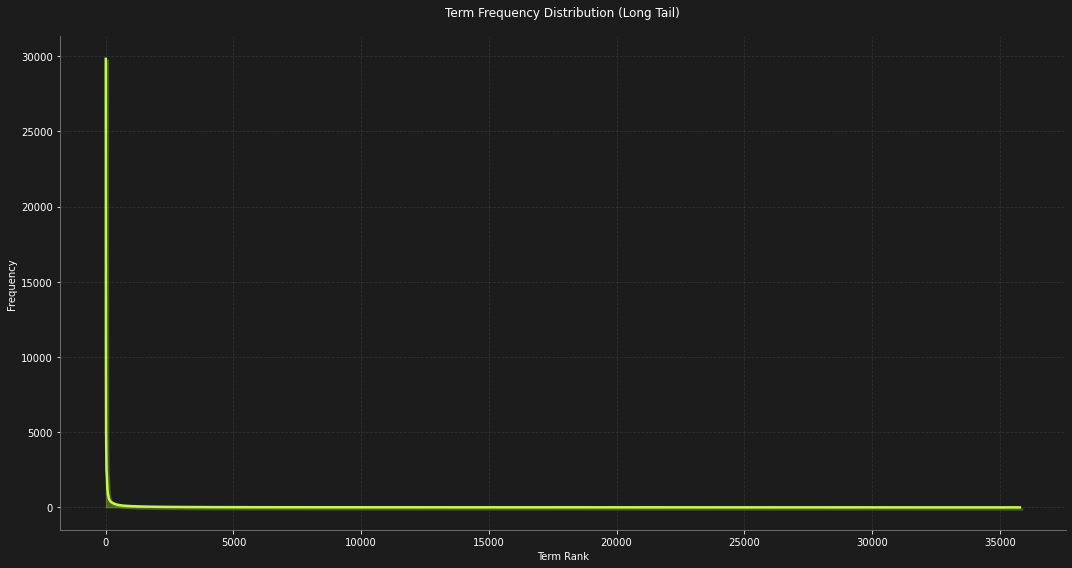

In [57]:
import matplotlib.patheffects as pe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def create_long_tail_visualization(X_counts, count_vect):

    # Calculate frequencies
    term_freq = np.asarray(X_counts.sum(axis=0)).flatten()
    terms = count_vect.get_feature_names_out()
    
    # Create DataFrame
    freq_df = pd.DataFrame({
        'term': terms,
        'frequency': term_freq
    }).sort_values('frequency', ascending=False)
    
    # plot
    plt.figure(figsize=(15, 8))
    
    # long tail curve
    x = range(len(freq_df))
    y = freq_df['frequency']
    
    plt.plot(x, y, color='#C1FF33', linewidth=2.5, 
             path_effects=[pe.SimpleLineShadow(shadow_color='gray', alpha=0.5), pe.Normal()])
    
    # Fill area under the curve
    plt.fill_between(x, y, color='#C1FF33', alpha=0.3)  # Use a translucent green fill
    
    # Set style
    plt.gca().set_facecolor('#1C1C1C')  # Dark gray background
    plt.gcf().set_facecolor('#1C1C1C')
    
    # Remove top and right borders
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_color('gray')
    plt.gca().spines['left'].set_color('gray')
    
    # Set labels and title
    plt.xlabel('Term Rank', color='white')
    plt.ylabel('Frequency', color='white')
    plt.title('Term Frequency Distribution (Long Tail)', color='white', pad=20)
    
    plt.tick_params(axis='x', colors='white')
    plt.tick_params(axis='y', colors='white')
    
    # Add grid
    plt.grid(True, linestyle='--', alpha=0.2, color='gray')
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

# Utilize function
create_long_tail_visualization(X_counts, count_vect)


### >>> **Exercise 15 (take home):** 

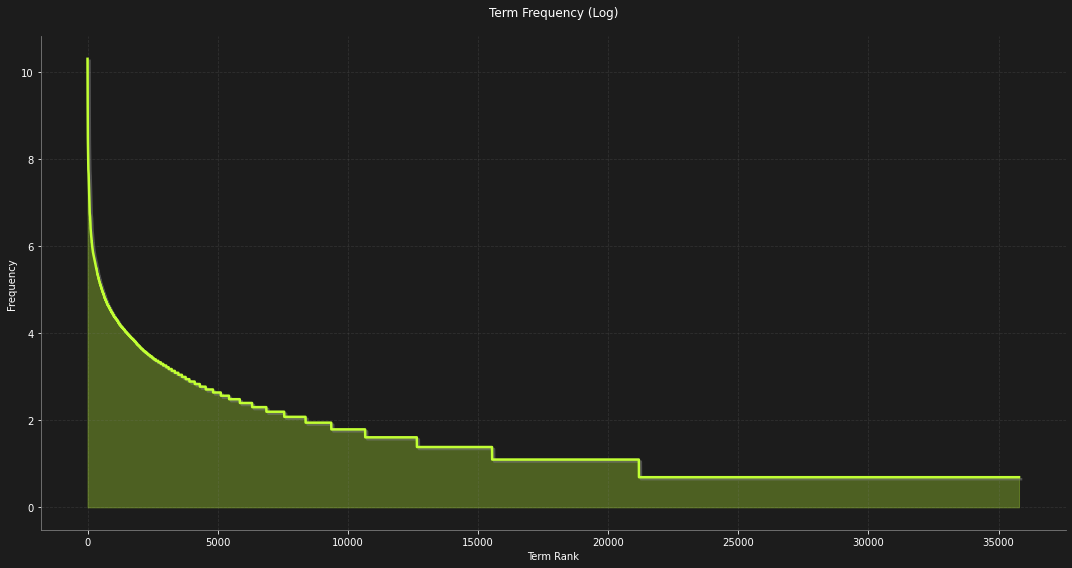

In [60]:
import matplotlib.patheffects as pe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

def create_long_tail_visualization(X_counts, count_vect):

    # Calculate frequencies
    term_freq = np.asarray(X_counts.sum(axis=0)).flatten()
    terms = count_vect.get_feature_names_out()
    term_freq_log = [math.log(freq + 1) for freq in term_freq]
    
    # Create DataFrame
    freq_df = pd.DataFrame({
        'term': terms,
        'frequency': term_freq_log
    }).sort_values('frequency', ascending=False)
    
    # plot
    plt.figure(figsize=(15, 8))
    
    # long tail curve
    x = range(len(freq_df))
    y = freq_df['frequency']
    
    plt.plot(x, y, color='#C1FF33', linewidth=2.5, 
             path_effects=[pe.SimpleLineShadow(shadow_color='gray', alpha=0.5), pe.Normal()])
    
    # Fill area under the curve
    plt.fill_between(x, y, color='#C1FF33', alpha=0.3)  # Use a translucent green fill
    
    # Set style
    plt.gca().set_facecolor('#1C1C1C')  # Dark gray background
    plt.gcf().set_facecolor('#1C1C1C')
    
    # Remove top and right borders
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_color('gray')
    plt.gca().spines['left'].set_color('gray')
    
    # Set labels and title
    plt.xlabel('Term Rank', color='white')
    plt.ylabel('Frequency', color='white')
    plt.title('Term Frequency (Log)', color='white', pad=20)
    
    plt.tick_params(axis='x', colors='white')
    plt.tick_params(axis='y', colors='white')
    
    # Add grid
    plt.grid(True, linestyle='--', alpha=0.2, color='gray')
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

# Utilize function
create_long_tail_visualization(X_counts, count_vect)


### >>> **Exercise 16 (take home):** 

What I found is Common high-frequency words like "the," "of," "to," and "and" appear in all categories, reflecting general English usage. However, each category has distinctive high-frequency words related to its topic: comp.graphics includes terms like "distributed" and "open"; soc.religion.christian has "pagan" and "claims"; sci.med features "toxic" and "genetic"; and alt.atheism includes "court" and "lot."

### >>> **Exercise 17 (take home):** 

In [61]:
import time
from PAMI.frequentPattern.topk import FAE as topk
from PAMI.frequentPattern.maximal import MaxFPGrowth as maxfp
from PAMI.frequentPattern.basic import FPGrowth as basic_fp

def run_fae_topk(k_values=[500, 1000, 1500]):
    print("=== FAE Top-K Results ===")
    results = []
    
    for k in k_values:
        print(f"\nRunning Top-K with k={k}")
        start_time = time.time()
        
        # run FAE Top-K
        topk_obj = topk.FAE(iFile='td_freq_db_comp_graphics.csv', k=k)
        topk_obj.startMine()
        topk_patterns = topk_obj.getPatternsAsDataFrame()
        # calculate runtime
        runtime = time.time() - start_time
        # store resultssns
        results.append({
            'k': k,
            'patterns': len(topk_patterns),
            'runtime': runtime,
            'sample_patterns': topk_patterns.head(5)
        })
        
        print(f"Number of patterns found: {len(topk_patterns)}")
        print(f"Runtime: {runtime:.4f} seconds")
        print("Sample patterns:")
        print(topk_patterns.head())

    return results

def run_maxfpgrowth(min_sups=[3, 6, 9]):
    print("\n=== MaxFPGrowth Results ===")
    results = []
    
    for min_sup in min_sups:
        print(f"\nRunning MaxFPGrowth with minSup={min_sup}")
        start_time = time.time()
        # run MaxFPGrowth
        maxfp_obj = maxfp.MaxFPGrowth(iFile='td_freq_db_comp_graphics.csv', minSup=min_sup)
        maxfp_obj.startMine()
        maxfp_patterns = maxfp_obj.getPatternsAsDataFrame()
        # calculate runtime
        runtime = time.time() - start_time
        # store results
        results.append({
            'minSup': min_sup,
            'patterns': len(maxfp_patterns),
            'runtime': runtime,
            'sample_patterns': maxfp_patterns.head(5)
        })
        
        print(f"Number of patterns found: {len(maxfp_patterns)}")
        print(f"Runtime: {runtime:.4f} seconds")
        print("Sample patterns:")
        print(maxfp_patterns.head())

    return results

def run_basic_fpgrowth(min_sup=9):
    print("\n=== Basic FPGrowth Results ===")
    start_time = time.time()
    # run Basic FPGrowth
    fpgrowth_obj = basic_fp.FPGrowth(iFile='td_freq_db_comp_graphics.csv', minSup=min_sup)
    fpgrowth_obj.mine()
    fpgrowth_patterns = fpgrowth_obj.getPatternsAsDataFrame()
    # calculate runtime
    runtime = time.time() - start_time
    # store results
    result = {
        'patterns': len(fpgrowth_patterns),
        'runtime': runtime,
        'sample_patterns': fpgrowth_patterns.head(5)
    }
    
    print(f"Number of patterns found: {len(fpgrowth_patterns)}")
    print(f"Runtime: {runtime:.4f} seconds")
    print("Sample patterns:")
    print(fpgrowth_patterns.head())
    
    return result

def compare_results(topk_results, maxfp_results, fpgrowth_result):
    print("\n=== Compare of Algorithms ===")
    
    print("\nFAE Top-K Performance:")
    for result in topk_results:
        print(f"k={result['k']}:")
        print(f"- Patterns found: {result['patterns']}")
        print(f"- Runtime: {result['runtime']:.4f} seconds")
    
    print("\nMaxFPGrowth Performance:")
    for result in maxfp_results:
        print(f"minSup={result['minSup']}:")
        print(f"- Patterns found: {result['patterns']}")
        print(f"- Runtime: {result['runtime']:.4f} seconds")
    
    print("\nBasic FPGrowth Performance:")
    print(f"- Patterns found: {fpgrowth_result['patterns']}")
    print(f"- Runtime: {fpgrowth_result['runtime']:.4f} seconds")

# Execute all comparisons
def run_all_comparisons():
    topk_results = run_fae_topk()
    maxfp_results = run_maxfpgrowth()
    fpgrowth_result = run_basic_fpgrowth()
    compare_results(topk_results, maxfp_results, fpgrowth_result)

run_all_comparisons()

=== FAE Top-K Results ===

Running Top-K with k=500


/var/folders/7k/s0wckbf515vd17mx2q8rst2m0000gn/T/ipykernel_5694/453245664.py:17: DeprecationWarning:

Call to deprecated method startMine. (It is recommended to use 'mine()' instead of 'startMine()' for mining process. Starting from January 2025, 'startMine()' will be completely terminated.)



 TopK frequent patterns were successfully generated using FAE algorithm.
Number of patterns found: 500
Runtime: 1.2892 seconds
Sample patterns:
  Patterns  Support
0    maybe       26
1     life       24
2    ideas       24
3     feel       24
4    tried       24

Running Top-K with k=1000


/var/folders/7k/s0wckbf515vd17mx2q8rst2m0000gn/T/ipykernel_5694/453245664.py:17: DeprecationWarning:

Call to deprecated method startMine. (It is recommended to use 'mine()' instead of 'startMine()' for mining process. Starting from January 2025, 'startMine()' will be completely terminated.)



 TopK frequent patterns were successfully generated using FAE algorithm.
Number of patterns found: 1000
Runtime: 2.5163 seconds
Sample patterns:
  Patterns  Support
0    maybe       26
1     life       24
2    ideas       24
3     feel       24
4    tried       24

Running Top-K with k=1500


/var/folders/7k/s0wckbf515vd17mx2q8rst2m0000gn/T/ipykernel_5694/453245664.py:17: DeprecationWarning:

Call to deprecated method startMine. (It is recommended to use 'mine()' instead of 'startMine()' for mining process. Starting from January 2025, 'startMine()' will be completely terminated.)



 TopK frequent patterns were successfully generated using FAE algorithm.
Number of patterns found: 1500
Runtime: 4.9398 seconds
Sample patterns:
  Patterns  Support
0    maybe       26
1     life       24
2    ideas       24
3     feel       24
4    tried       24

=== MaxFPGrowth Results ===

Running MaxFPGrowth with minSup=3


/var/folders/7k/s0wckbf515vd17mx2q8rst2m0000gn/T/ipykernel_5694/453245664.py:47: DeprecationWarning:

Call to deprecated method startMine. (It is recommended to use 'mine()' instead of 'startMine()' for mining process. Starting from January 2025, 'startMine()' will be completely terminated.)



Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Number of patterns found: 6872
Runtime: 31.7432 seconds
Sample patterns:
                                            Patterns  Support
0  due bytes responsible 000 opinion 640x480 rob ...        3
1                                               bag         3
2                                       garbo uwasa         3
3          wrong 200 responsible 000 umn 480 640 tc         3
4                             responsible 000 essex         3

Running MaxFPGrowth with minSup=6


/var/folders/7k/s0wckbf515vd17mx2q8rst2m0000gn/T/ipykernel_5694/453245664.py:47: DeprecationWarning:

Call to deprecated method startMine. (It is recommended to use 'mine()' instead of 'startMine()' for mining process. Starting from January 2025, 'startMine()' will be completely terminated.)



Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Number of patterns found: 1340
Runtime: 1.0494 seconds
Sample patterns:
                              Patterns  Support
0                           tim brock         6
1                                face         6
2                              pardon         6
3  removal silent assassin cellar tsa         6
4                            creative         6

Running MaxFPGrowth with minSup=9
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Number of patterns found: 660
Runtime: 0.1624 seconds
Sample patterns:
               Patterns  Support
0                  tim         9
1               option         9
2        rumours 68070         9
3                 chip         9
4  rumours mcmains unt         9

=== Basic FPGrowth Results ===


/var/folders/7k/s0wckbf515vd17mx2q8rst2m0000gn/T/ipykernel_5694/453245664.py:47: DeprecationWarning:

Call to deprecated method startMine. (It is recommended to use 'mine()' instead of 'startMine()' for mining process. Starting from January 2025, 'startMine()' will be completely terminated.)



Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Number of patterns found: 33574
Runtime: 0.2165 seconds
Sample patterns:
     Patterns  Support
0  individual        9
1     certain        9
2        hall        9
3        mike        9
4          vr        9

=== Comparison of Algorithms ===

FAE Top-K Performance:
k=500:
- Patterns found: 500
- Runtime: 1.2892 seconds
k=1000:
- Patterns found: 1000
- Runtime: 2.5163 seconds
k=1500:
- Patterns found: 1500
- Runtime: 4.9398 seconds

MaxFPGrowth Performance:
minSup=3:
- Patterns found: 6872
- Runtime: 31.7432 seconds
minSup=6:
- Patterns found: 1340
- Runtime: 1.0494 seconds
minSup=9:
- Patterns found: 660
- Runtime: 0.1624 seconds

Basic FPGrowth Performance:
- Patterns found: 33574
- Runtime: 0.2165 seconds


In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

In [ ]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj2 = alg.FPGrowth(iFile='td_freq_db_alt_atheism.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_alt_atheism= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_alt_atheism))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

In [ ]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj3 = alg.FPGrowth(iFile='td_freq_db_comp_graphics.csv', minSup=minSup)
obj3.mine()
frequentPatternsDF_comp_graphics= obj3.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_comp_graphics))) #print the total number of patterns
print('Runtime: ' + str(obj3.getRuntime())) #measure the runtime

In [ ]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj4 = alg.FPGrowth(iFile='td_freq_db_soc_religion_christian.csv', minSup=minSup)
obj4.mine()
frequentPatternsDF_soc_religion_christian= obj4.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_soc_religion_christian))) #print the total number of patterns
print('Runtime: ' + str(obj4.getRuntime())) #measure the runtime

In [ ]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_sci_med.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_sci_med= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_sci_med))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

In [ ]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_sci_med, frequentPatternsDF_soc_religion_christian, frequentPatternsDF_comp_graphics, frequentPatternsDF_alt_atheism]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

In [ ]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_sci_med, frequentPatternsDF_soc_religion_christian, frequentPatternsDF_comp_graphics, frequentPatternsDF_alt_atheism]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['text'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

In [81]:
#Applying dimensionality reduction with only the document-term frequency data
#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)

NameError: name 'PCA' is not defined

### >>> Exercise 18 (take home):

In [ ]:
# Answer here
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Apply dimensionality reduction to 3 components
X_pca_3d = PCA(n_components=3).fit_transform(tdm_df.values)
X_tsne_3d = TSNE(n_components=3).fit_transform(tdm_df.values)
X_umap_3d = umap.UMAP(n_components=3).fit_transform(tdm_df.values)

# Create function for plots
def plot_3d_scatter(data, title, elev, azim):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot each category with different colors
    colors = ['coral', 'blue', 'black', 'orange']
    categories = X['category_name'].unique()
    
    for color, category in zip(colors, categories):
        mask = X['category_name'] == category
        ax.scatter(data[mask, 0], 
                  data[mask, 1], 
                  data[mask, 2],
                  c=color,
                  label=category,
                  alpha=0.6)
    
    ax.set_title(f"{title}\nElevation: {elev}, Azimuth: {azim}")
    ax.legend()
    ax.view_init(elev=elev, azim=azim)
    plt.show()

# Plot each reduction method from three different angles
angles = [(20, 45), (45, 120), (60, 240)] 

for elev, azim in angles:
    plot_3d_scatter(X_pca_3d, "PCA 3D", elev, azim)
    plot_3d_scatter(X_tsne_3d, "t-SNE 3D", elev, azim)
    plot_3d_scatter(X_umap_3d, "UMAP 3D", elev, azim)

1. UMAP :
- Demonstrates the best class separation effect
- At elevation=60°, azimuth=240°, clear separation of sci.med from others
- Maintains both local and global structure effectively
- Shows consistent category clustering across different angles

2. t-SNE :
- Exhibits spherical distribution
- Significant overlap and mixing
- Patterns vary significantly across different angles
- Scattered distribution of distant points

3. PCA :
- Most points clustered on a plane
- Obvious linear projection pattern
- Poorest separation effect
- Extreme outlier distribution

**Separation Effectiveness: UMAP > t-SNE > PCA**

- Angle Sensitivity:
  * UMAP maintains stable structure across different angles
  * t-SNE shows significant variations across different angles
  * PCA maintains relatively fixed structure across different angles

### >>> **Exercise 19 (take home):**

In [52]:
# Answer here
from sklearn import preprocessing 

mlb = preprocessing.LabelBinarizer()

mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()

X[0:9]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name bin_category_name  
0           comp.graphics      [0, 1, 0, 0]  
1           comp.graphics      [0, 1, 0, 0]  
2  soc.religion.christian      [0, 0, 0, 1]  
3  soc.religion.christian      [0, 0, 0, 1]  
4  soc.religion.christian      [0, 0, 0, 1]  
5  soc.religion.christian      [0, 0, 0, 1]  
6  soc.religion.christian      [0, 0, 0, 1]  
7                 sci.med      [0, 0, 1, 0]  
8                 sci.med      [0, 0, 1, 0]

## SECOND : Follow the same process on the new dataset.

### 1. Data Preparation & Transformation

In [87]:
# Import libraries
%pip install datasets
from datasets import load_dataset
import pandas as pd
import numpy as np

# Load and convert to DataFrame
ds = load_dataset("Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data")
df = pd.DataFrame(ds['train'])

# Data exploration
print("Dataset size:", len(df))
print("\nColumns:", df.columns)
print("\nFirst 5 records:")

print(df.head())

# Check distribution
print("\nSentiment distribution:")
print(df['sentiment'].value_counts())

Note: you may need to restart the kernel to use updated packages.
Dataset size: 1500

Columns: Index(['sentiment', 'comment'], dtype='object')

First 5 records:
       sentiment                                            comment
0  not nostalgia  He was a singer with a golden voice that I lov...
1      nostalgia  The mist beautiful voice ever I listened to hi...
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...
4      nostalgia  listening to his songs reminds me of my mum wh...

Sentiment distribution:
not nostalgia    750
nostalgia        750
Name: sentiment, dtype: int64


In [3]:
# Convert the dataset to a binary classification, not nostalgia(1) vs nostalgia(0)
X = df.copy()
X = X.rename(columns={
    'comment': 'text',
    'sentiment': 'category_name'
})

# Convert categories to numerical values
# Use LabelEncoder to convert category_name to category
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['category'] = le.fit_transform(X['category_name'])

# Verify
print("Category mapping:", dict(zip(le.classes_, le.transform(le.classes_))))
print("\nFirst 5 records after transformation:")
print(X.head())

Category mapping: {'nostalgia': 0, 'not nostalgia': 1}

First 5 records after transformation:
   category_name                                               text  category
0  not nostalgia  He was a singer with a golden voice that I lov...         1
1      nostalgia  The mist beautiful voice ever I listened to hi...         0
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...         0
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...         1
4      nostalgia  listening to his songs reminds me of my mum wh...         0


### 2.Dealing with Missing Values and duplicated data

In [4]:
# Check missing values
print("\nMissing values:")
print(df.isnull().sum())

# Check for duplicates
print("\nDuplicates:", df.duplicated().sum())
# Drop duplicates without keeping any copies
X.drop_duplicates(keep=False, inplace=True)

# Make sure duplicates are removed
print("Duplicates after removed:", sum(X.duplicated()))


Missing values:
sentiment    0
comment      0
dtype: int64

Duplicates: 1
Duplicates after removed: 0


### 3. Data Preprocessing - Sampling

In [5]:
# Create a sample of 1000 records from dataset
X_sample = X.sample(n=1000)

# Check the size
print("Sample size:", len(X_sample))

# Display first few line of the sample
print("\nFirst few records of the sample:")
print(X_sample[0:10])

Sample size: 1000

First few records of the sample:
      category_name                                               text  \
468       nostalgia  Thanks southam. My pleasure  I  am glad it bro...   
1138      nostalgia  Every time when I listen to this song in the n...   
634       nostalgia  My parents played this song every Saturday mor...   
552       nostalgia  I don't know how I stumbled on this wonderful ...   
846       nostalgia  It reminds me of Sunday rides with an ex. Love...   
155       nostalgia  Beautiful!!  I remember this and it's lovely! ...   
1398      nostalgia         Damn I wish I could go back to these days.   
182   not nostalgia     Why do all the sad songs seem to bear my name?   
439   not nostalgia  He's  a good  singer  and  he's  got  a .lovel...   
843   not nostalgia  My grandpa send me this song and wow it is goo...   

      category  
468          0  
1138         0  
634          0  
552          0  
846          0  
155          0  
1398         0

Original dataset distribution:
category_name
nostalgia        750
not nostalgia    748
Name: count, dtype: int64


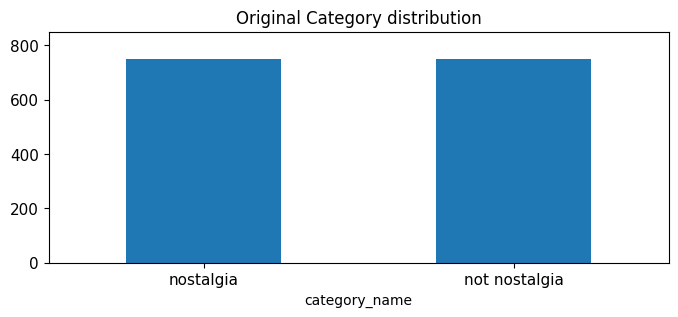


Sampled dataset distribution:
category_name
not nostalgia    501
nostalgia        499
Name: count, dtype: int64


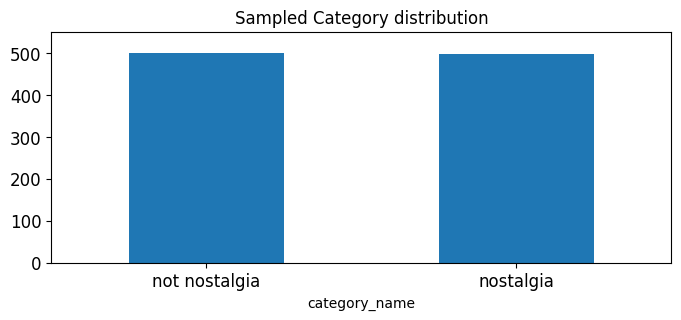

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

# Show and plot category distribution for original dataset
print("Original dataset distribution:")
print(X.category_name.value_counts())

X.category_name.value_counts().plot(kind='bar',
                                  title='Original Category distribution',
                                  ylim=[0, max(X.category_name.value_counts()) + 100],
                                  rot=0,
                                  fontsize=11,
                                  figsize=(8,3))
plt.show()

# Show and plot category distribution for sampled dataset
print("\nSampled dataset distribution:")
print(X_sample.category_name.value_counts())

X_sample.category_name.value_counts().plot(kind='bar',
                                         title='Sampled Category distribution',
                                         ylim=[0, max(X_sample.category_name.value_counts()) + 50],
                                         rot=0,
                                         fontsize=12,
                                         figsize=(8,3))
plt.show()

### 4. Data Preprocessing - Feature Creation

In [7]:
import nltk
import nltk.data
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

# Download some NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('treebank')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


True

In [8]:
# Create unigrams feature
# Takes a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: word_tokenize(x))

# Display the first 4 records with their unigrams
print("First few records with unigrams:")
print(X[0:4]["unigrams"])



First few records with unigrams:
0    [He, was, a, singer, with, a, golden, voice, t...
1    [The, mist, beautiful, voice, ever, I, listene...
2    [I, have, most, of, Mr., Reeves, songs, ., Alw...
3    [30, day, leave, from, 1st, tour, in, Viet, Na...
Name: unigrams, dtype: object


### 5. Data Preprocessing - Feature Subset Selection

Vocabulary size: 3730

Example features by index:
Feature 932: ['00' '000' '045' ... 'yup' 'zealand' 'zulus']
Feature 1865: ['00' '000' '045' ... 'yup' 'zealand' 'zulus']
Feature 2797: ['00' '000' '045' ... 'yup' 'zealand' 'zulus']

First 10 terms in vocabulary:
['00' '000' '045' '07' '10' '100' '10m' '11' '11th' '12' '13' '14' '15'
 '150' '16' '16years' '17' '17th' '18' '19']

Document-term matrix:
(1498, 3730)

Sample of document-term matrix (first 10 terms):
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


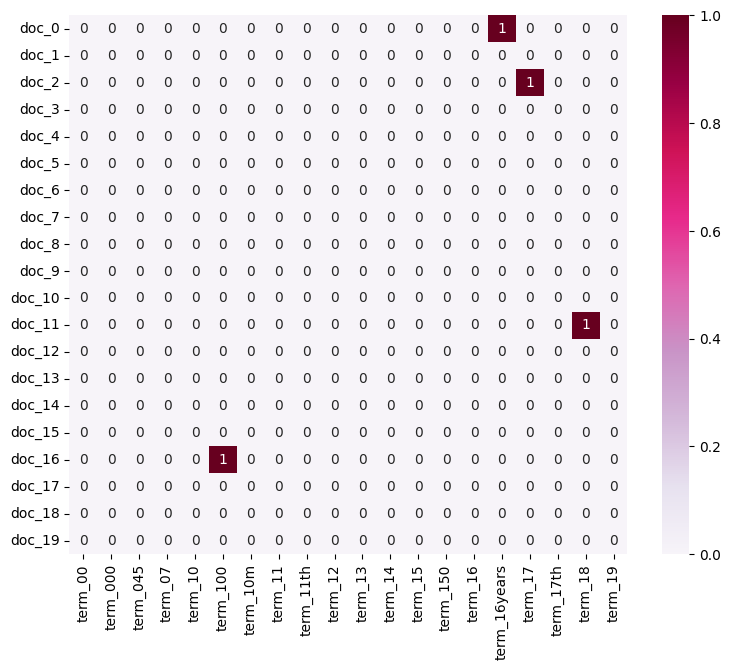

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

# Fit CountVectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X['text'])

# Get vocabulary size
vocab_size = len(count_vect.get_feature_names_out())
print(f"Vocabulary size: {vocab_size}")


# Look some example features
print("\nExample features by index:")
print(f"Feature {932}: {count_vect.get_feature_names_out()}")# 25% of size
print(f"Feature {1865}: {count_vect.get_feature_names_out()}")# 50% of size
print(f"Feature {2797}: {count_vect.get_feature_names_out()}")# 75% of size

# Display first few terms
print("\nFirst 10 terms in vocabulary:")
print(count_vect.get_feature_names_out()[:20])

# Check the matrix
print("\nDocument-term matrix:")
print(X_counts.shape)

# Show a sample of the term-document matrix
print("\nSample of document-term matrix (first 10 terms):")
print(X_counts[0:5, 0:10].toarray())

import seaborn as sns

# Create heatmap
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, 0:20].toarray()

# Create DataFrame for heatmap
df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)

# Create heatmap
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0,
                 vmax=1,
                 annot=True)
plt.show()

### 6. Data Preprocessing - Attribute Transformation / Aggregation

<ipython-input-13-6a78c306fa23>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation=90)


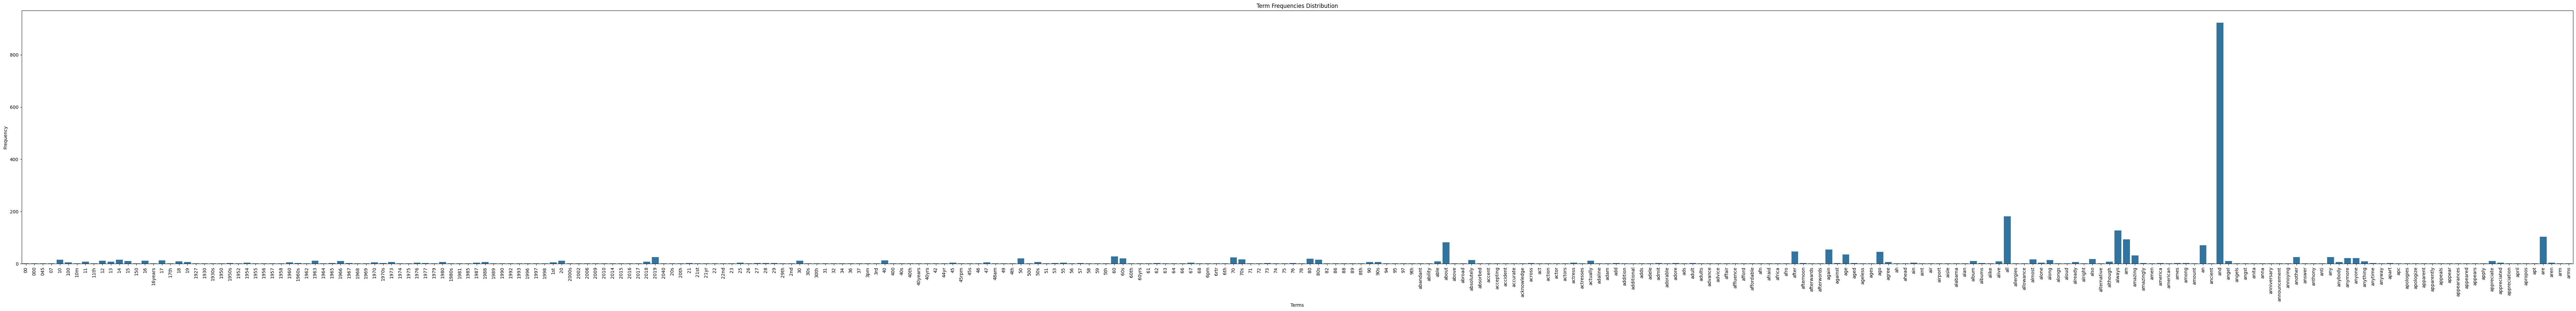

<ipython-input-13-6a78c306fa23>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation=90)


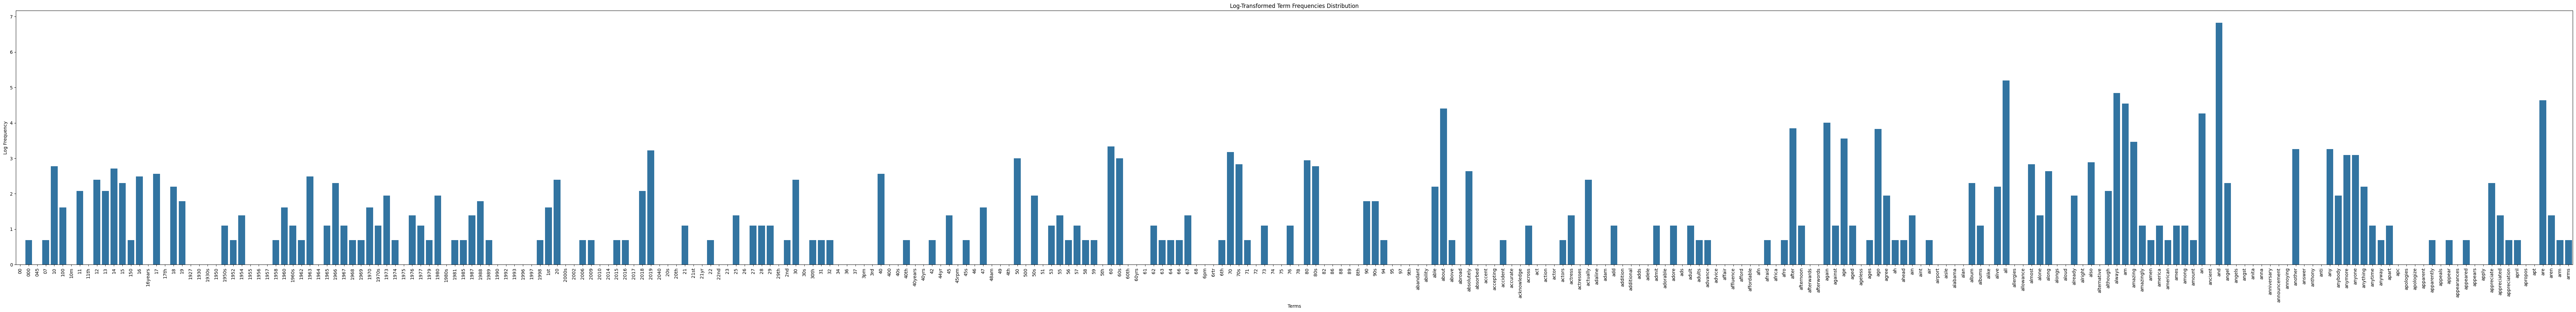


Top 20 most frequent terms:
the: 1351
this: 996
to: 937
and: 923
my: 765
song: 747
of: 722
in: 612
it: 586
was: 584
me: 388
is: 375
you: 367
that: 360
so: 315
love: 309
when: 299
back: 290
for: 278
music: 267


In [13]:
# Calculate frequencies
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

# Frequency distribution visualization
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation=90)
plt.title('Term Frequencies Distribution')
plt.xlabel('Terms')
plt.ylabel('Frequency')
plt.show()

# Log transformation
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation=90)
plt.title('Log-Transformed Term Frequencies Distribution')
plt.xlabel('Terms')
plt.ylabel('Log Frequency')
plt.show()

# Sort by frequency and show
term_freq_dict = dict(zip(count_vect.get_feature_names_out(), term_frequencies))

# Sort by frequency
sorted_term_freq = sorted(term_freq_dict.items(), key=lambda x: x[1], reverse=True)

# Verify by displaying top 20 most frequent terms
print("\nTop 20 most frequent terms:")
for term, freq in sorted_term_freq[:20]:
    print(f"{term}: {freq}")

### 7. Data Preprocessing - Dimensionality Reduction

In [62]:
!pip install scikit-learn pandas numpy matplotlib plotly seaborn nltk pami umap-learn

Applying dimensionality reduction techniques... This might take a few minutes.
Shapes after reduction:
PCA shape: (1498, 2)
t-SNE shape: (1498, 2)
UMAP shape: (1498, 2)


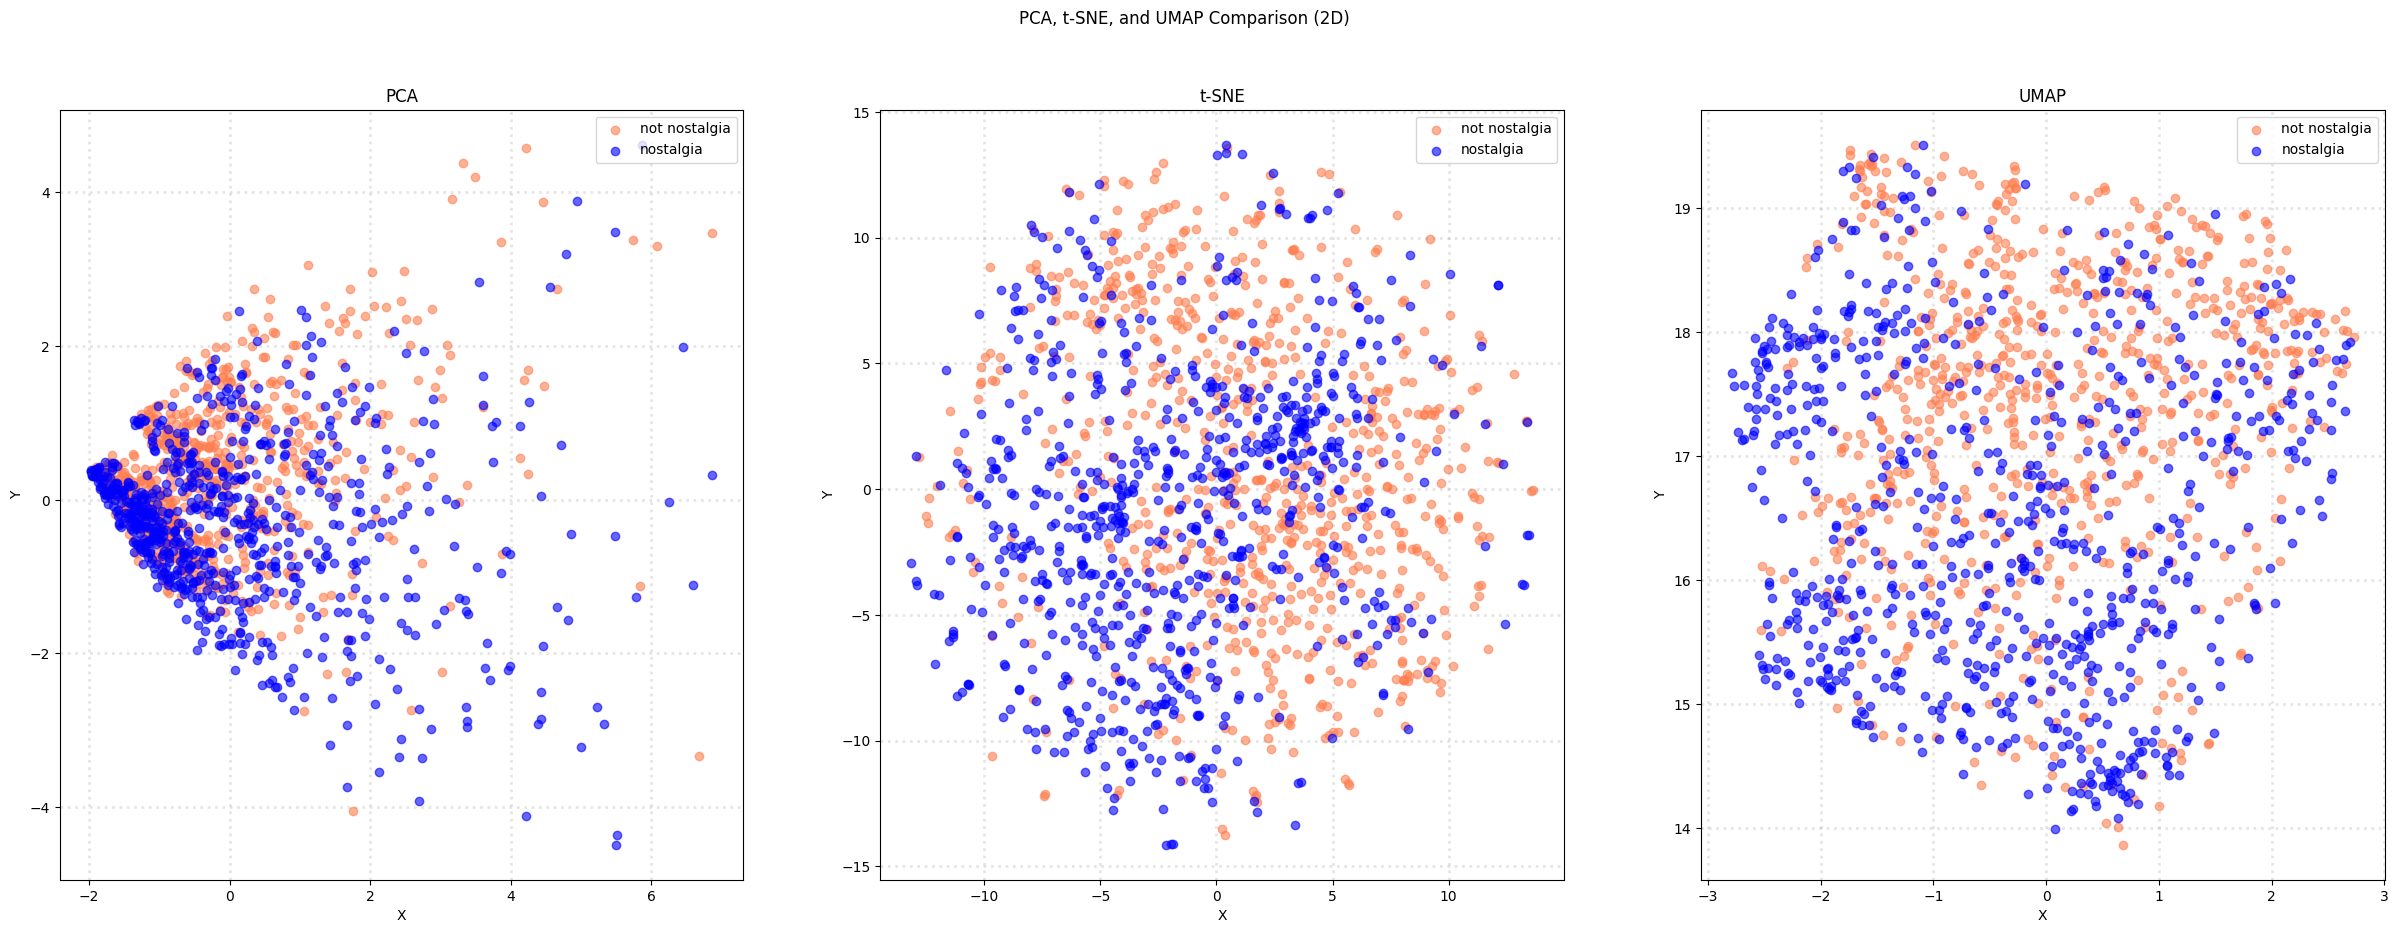

In [18]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

# Reduce dimension
print("Applying dimensionality reduction techniques... This might take a few minutes.")

# PCA, t-SNE, and UMAP
X_pca_tdm = PCA(n_components=2).fit_transform(X_counts.toarray())
X_tsne_tdm = TSNE(n_components=2).fit_transform(X_counts.toarray())
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(X_counts.toarray())

# Check shapes
print("Shapes after reduction:")
print("PCA shape:", X_pca_tdm.shape)
print("t-SNE shape:", X_tsne_tdm.shape)
print("UMAP shape:", X_umap_tdm.shape)

# 2D visualizations
col = ['coral', 'blue']  # Two colors for binary pattern
categories = X['category_name'].unique()

# Set up the plot
fig, axes = plt.subplots(1, 3, figsize=(30, 10))
fig.suptitle('PCA, t-SNE, and UMAP Comparison (2D)')

# Define scatter plot function
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        mask = X['category_name'] == category
        xs = X_reduced[mask, 0] #X
        ys = X_reduced[mask, 1] #Y
        ax.scatter(xs, ys, c=c, marker='o', label=category, alpha=0.6)

    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()


Viewing angle - Elevation: 20, Azimuth: 45


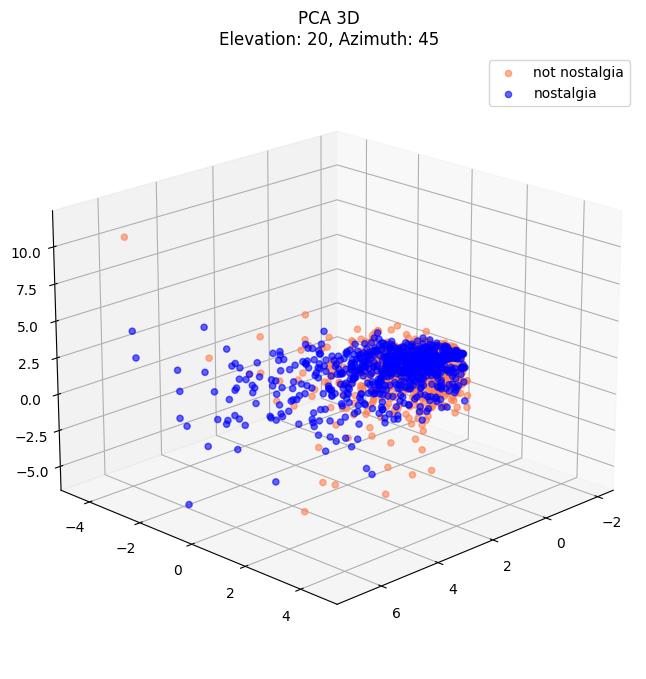

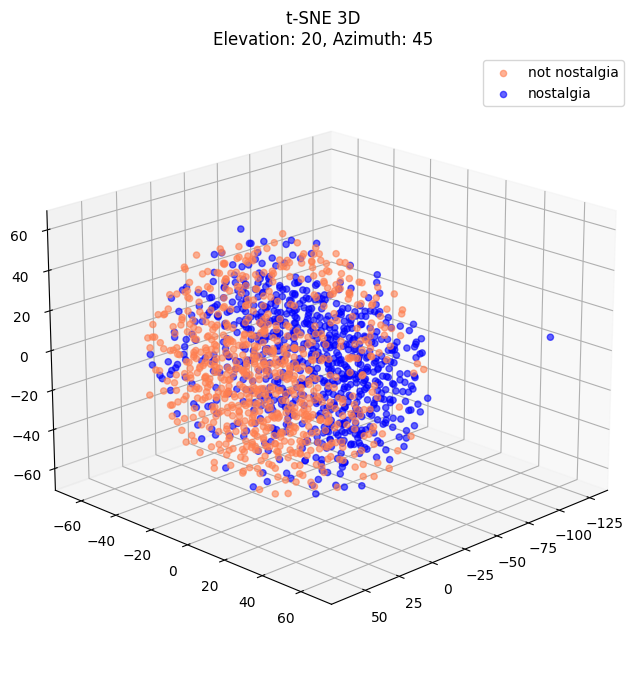

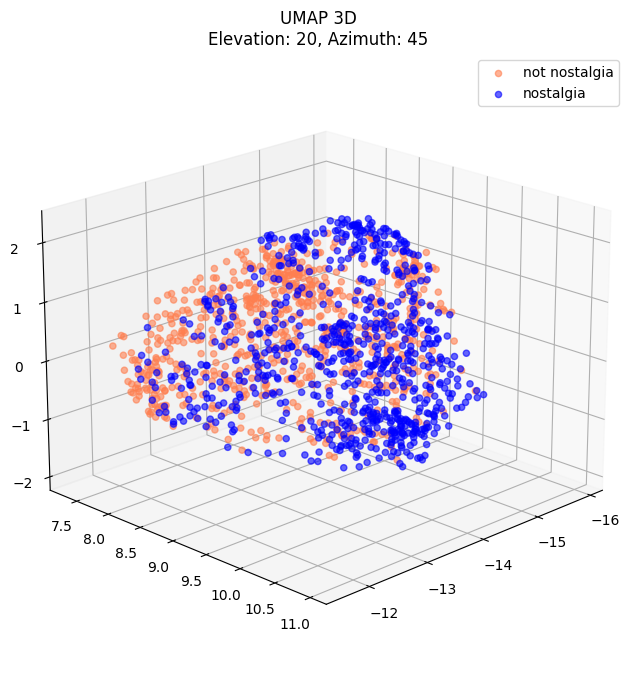


Viewing angle - Elevation: 45, Azimuth: 120


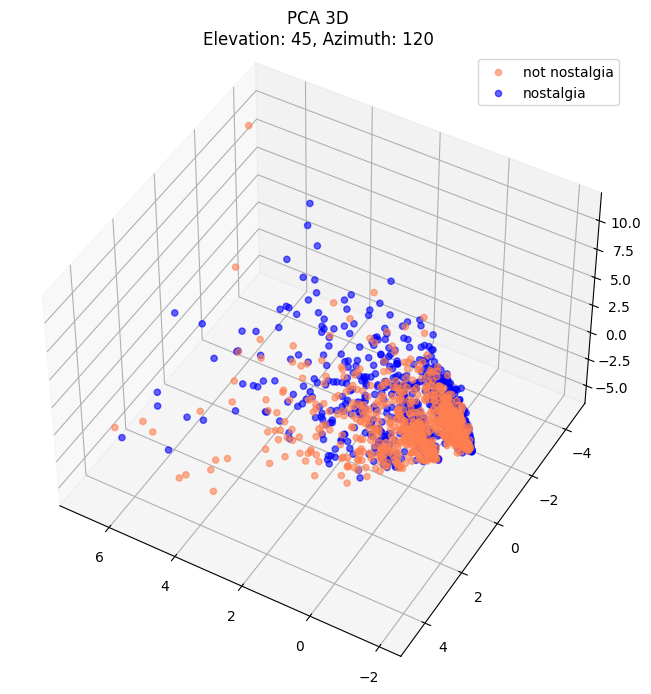

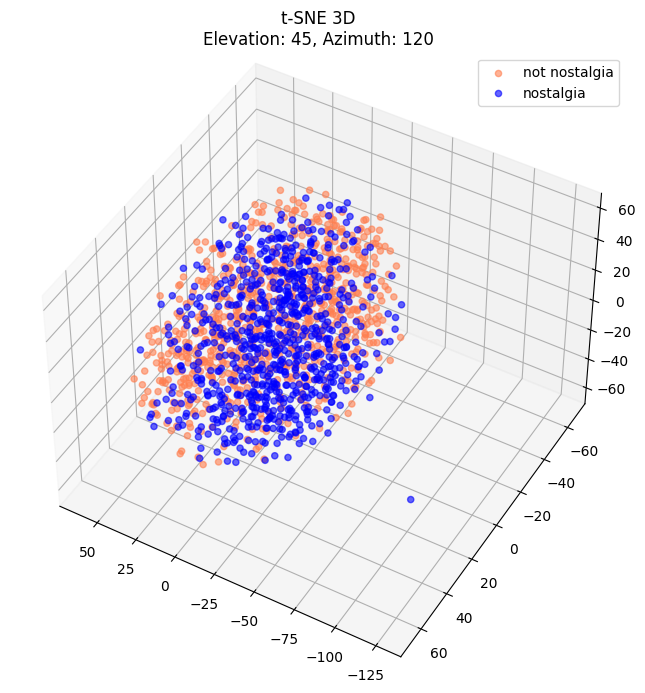

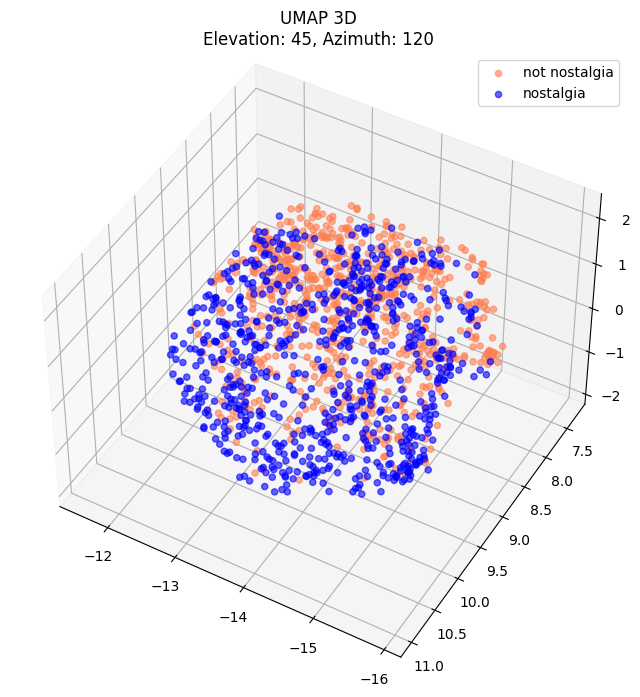


Viewing angle - Elevation: 60, Azimuth: 240


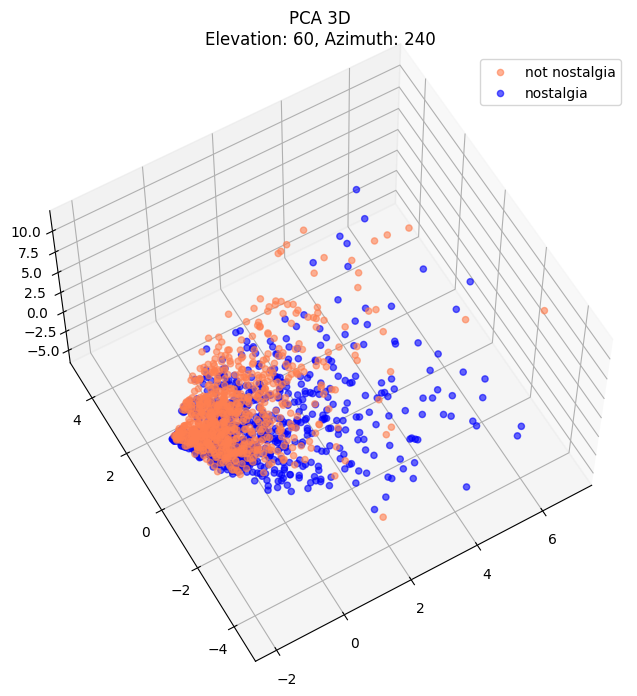

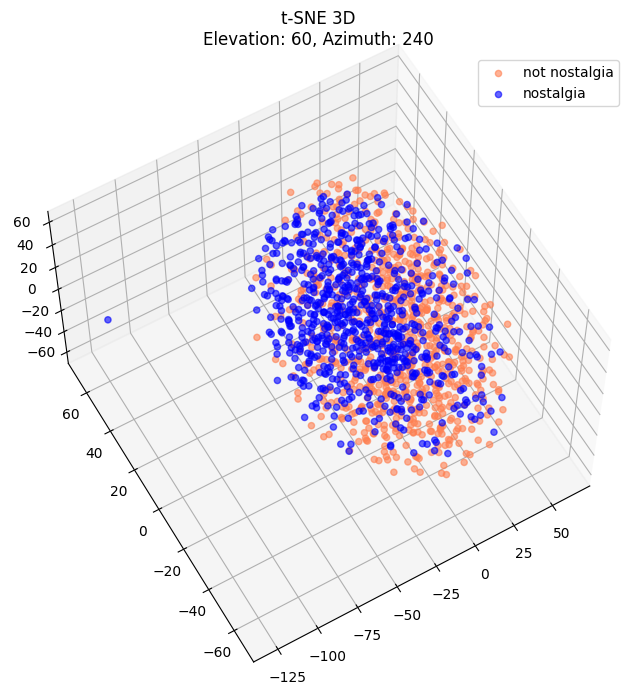

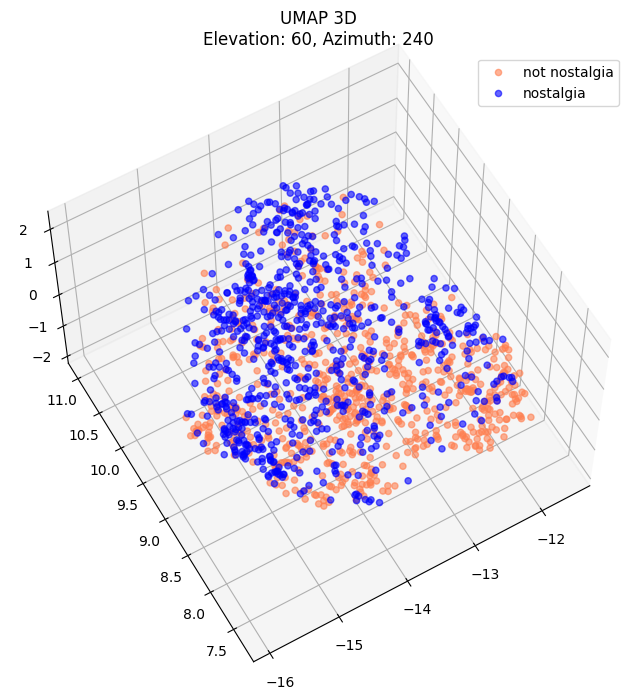

In [19]:
from mpl_toolkits.mplot3d import Axes3D

# Apply 3D dimensionality reduction
X_pca_3d = PCA(n_components=3).fit_transform(X_counts.toarray())
X_tsne_3d = TSNE(n_components=3).fit_transform(X_counts.toarray())
X_umap_3d = umap.UMAP(n_components=3).fit_transform(X_counts.toarray())

# Create 3D visualization function
def plot_3d_scatter(data, title, elev, azim):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot each category
    colors = ['coral', 'blue']
    categories = X['category_name'].unique()

    for color, category in zip(colors, categories):
        mask = X['category_name'] == category
        ax.scatter(data[mask, 0],
                  data[mask, 1],
                  data[mask, 2],
                  c=color,
                  label=category,
                  alpha=0.6)

    ax.set_title(f"{title}\nElevation: {elev}, Azimuth: {azim}")
    ax.legend()
    ax.view_init(elev=elev, azim=azim)
    plt.show()

# Plot with different angles
# Acorss three different angles
angles = [(20, 45), (45, 120), (60, 240)]

for elev, azim in angles:
    print(f"\nViewing angle - Elevation: {elev}, Azimuth: {azim}")
    plot_3d_scatter(X_pca_3d, "PCA 3D", elev, azim)
    plot_3d_scatter(X_tsne_3d, "t-SNE 3D", elev, azim)
    plot_3d_scatter(X_umap_3d, "UMAP 3D", elev, azim)

##### My investigation:

UMAP 3D: The UMAP plots reveal that the "nostalgia" and "not nostalgia" categories show more defined clusters, although there is still significant overlap between the categories. 

t-SNE 3D: The t-SNE plots for "nostalgia" and "not nostalgia" also show clusters but have a more scattered distribution compared to UMAP.

PCA 3D: The PCA plots, both at higher and lower elevations, show limited separation between the two categories.

### 8.Data Preprocessing - Discretization and Binarization

In [21]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

# LabelBinarizer
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)
# # Transform the category column
X['bin_category'] = mlb.transform(X.category).tolist()

# Display and verify the transformation
print("List first few rows with binary categories:")
print(X[['text', 'category', 'category_name', 'bin_category']].head())

# Do the same thing to category_name column as well
X['bin_category_name'] = mlb.fit_transform(X['category_name']).tolist()

# Compare both results
print("\n==Comparing original and name-based binary categories==")
print(X[['category_name', 'bin_category', 'bin_category_name']].head())

# Show up unique values in both binary columns
print("\nUnique values in bin_category:")
print(set(str(x) for x in X['bin_category']))
print("\nUnique values in bin_category_name:")
print(set(str(x) for x in X['bin_category_name']))

List first few rows with binary categories:
                                                text  category  category_name  \
0  He was a singer with a golden voice that I lov...         1  not nostalgia   
1  The mist beautiful voice ever I listened to hi...         0      nostalgia   
2  I have most of Mr. Reeves songs.  Always love ...         0      nostalgia   
3  30 day leave from 1st tour in Viet Nam to conv...         1  not nostalgia   
4  listening to his songs reminds me of my mum wh...         0      nostalgia   

  bin_category  
0          [1]  
1          [0]  
2          [0]  
3          [1]  
4          [0]  

==Comparing original and name-based binary categories==
   category_name bin_category bin_category_name
0  not nostalgia          [1]               [1]
1      nostalgia          [0]               [0]
2      nostalgia          [0]               [0]
3  not nostalgia          [1]               [1]
4      nostalgia          [0]               [0]

Unique values in bin_

### Data Exploration

In [22]:
# Randomly select 3 comments from dataset
document_to_transform_1 = []
random_record_1 = X.iloc[50]  # nostalgic
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]  # not nostalgic
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]  # nostalgic
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

# Display the selected comments
print("Comment 1 (Nostalgic):")
print(document_to_transform_1)
print("\nComment 2 (Not Nostalgic):")
print(document_to_transform_2)
print("\nComment 3 (Nostalgic):")
print(document_to_transform_3)

Comment 1 (Nostalgic):
['If I remember correctly, this song came out after Mr. Reeves passed away. I was about 10 years old when the disc jockey said that the news just came over the wire that he died in a plane crash.']

Comment 2 (Not Nostalgic):
['I love this song reminds me of the love of my life']

Comment 3 (Nostalgic):
['TURN MY MEMORIES BACK IN 1993, TO LAURA FROM COMO, ITALIA, THANK YOU, THANK YOU, THANK YOU']


In [23]:
from sklearn.preprocessing import binarize
from sklearn.metrics.pairwise import cosine_similarity

# Transform comments using CountVectorizer
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# Print vector representations
print("Count vectors of the comments:")
print("Comment 1:", document_vector_count_1.todense())
print("Comment 2:", document_vector_count_2.todense())
print("Comment 3:", document_vector_count_3.todense())

Count vectors of the comments:
Comment 1: [[0 0 0 ... 0 0 0]]
Comment 2: [[0 0 0 ... 0 0 0]]
Comment 3: [[0 0 0 ... 0 0 0]]


In [24]:
# Calculate Cosine Similarities
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3)

# Self similarities
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3)

# results
print("Cosine Similarities:")
print(f"Between Comment 1 and 2: {cos_sim_count_1_2[0][0]:.6f}")
print(f"Between Comment 1 and 3: {cos_sim_count_1_3[0][0]:.6f}")
print(f"Between Comment 2 and 3: {cos_sim_count_2_3[0][0]:.6f}")
print("\nSelf Similarities:")
print(f"Comment 1 with itself: {cos_sim_count_1_1[0][0]:.6f}")
print(f"Comment 2 with itself: {cos_sim_count_2_2[0][0]:.6f}")
print(f"Comment 3 with itself: {cos_sim_count_3_3[0][0]:.6f}")

Cosine Similarities:
Between Comment 1 and 2: 0.190347
Between Comment 1 and 3: 0.027379
Between Comment 2 and 3: 0.047946

Self Similarities:
Comment 1 with itself: 1.000000
Comment 2 with itself: 1.000000
Comment 3 with itself: 1.000000


In [28]:
# Additional :
# 1. Average similarity within sentiment categories
# 2. Average similarity between sentiment categories
def get_average_similarity_for_category(category_name, sample_size=1000):
    category_indices = X[X['category_name'] == category_name].index

    if len(category_indices) > sample_size:
        category_indices = np.random.choice(category_indices, sample_size, replace=False)

    texts = X.loc[category_indices, 'text'].tolist()

    vectors = count_vect.transform(texts)

    similarities = cosine_similarity(vectors)

    np.fill_diagonal(similarities, 0)  # exclude diagonal
    avg_similarity = similarities.sum() / (similarities.size - len(similarities))

    return avg_similarity

nostalgic_avg = get_average_similarity_for_category('nostalgia')
not_nostalgic_avg = get_average_similarity_for_category('not nostalgia')

print("\nAverage Similarity within Categories:")
print(f"Average similarity between nostalgic: {nostalgic_avg:.6f}")
print(f"Average similarity between not nostalgic: {not_nostalgic_avg:.6f}")


Average Similarity within Categories:
Average similarity between nostalgic: 0.166230
Average similarity between not nostalgic: 0.124106


The data points within the "nostalgic" category have a higher similarity, suggesting that this category is more consistent or similar. On the other hand, the "not nostalgic" category has a lower average similarity, which may indicate more diversity among the data points in this category.

#### I write my Data Classification part in the Third part

## Third: please attempt the following tasks on the new dataset



### 1. Generate meaningful new data visualizations

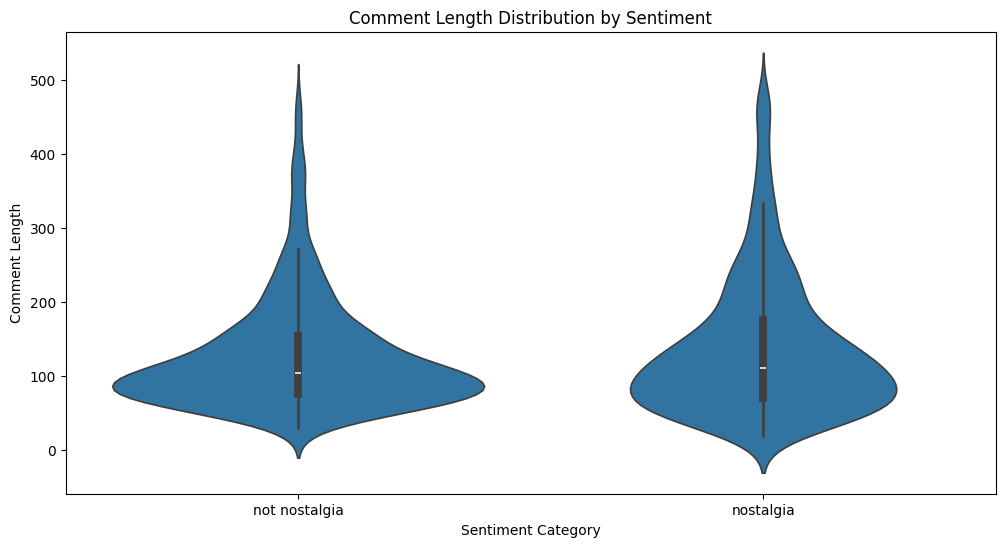

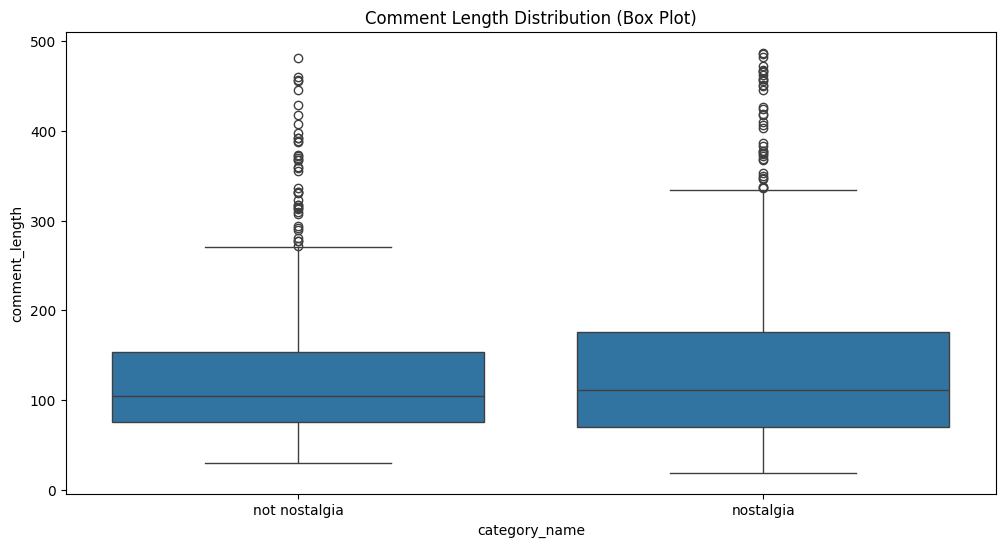

In [29]:
# Relationship between sentiment and comment length

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate comment lengths
X['comment_length'] = X['text'].str.len()

# Violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='category_name', y='comment_length', data=X)
plt.title('Comment Length Distribution by Sentiment')
plt.xlabel('Sentiment Category')
plt.ylabel('Comment Length')
plt.show()

# Add box plot for clearer quartile visualization
plt.figure(figsize=(12, 6))
sns.boxplot(x='category_name', y='comment_length', data=X)
plt.title('Comment Length Distribution (Box Plot)')
plt.show()

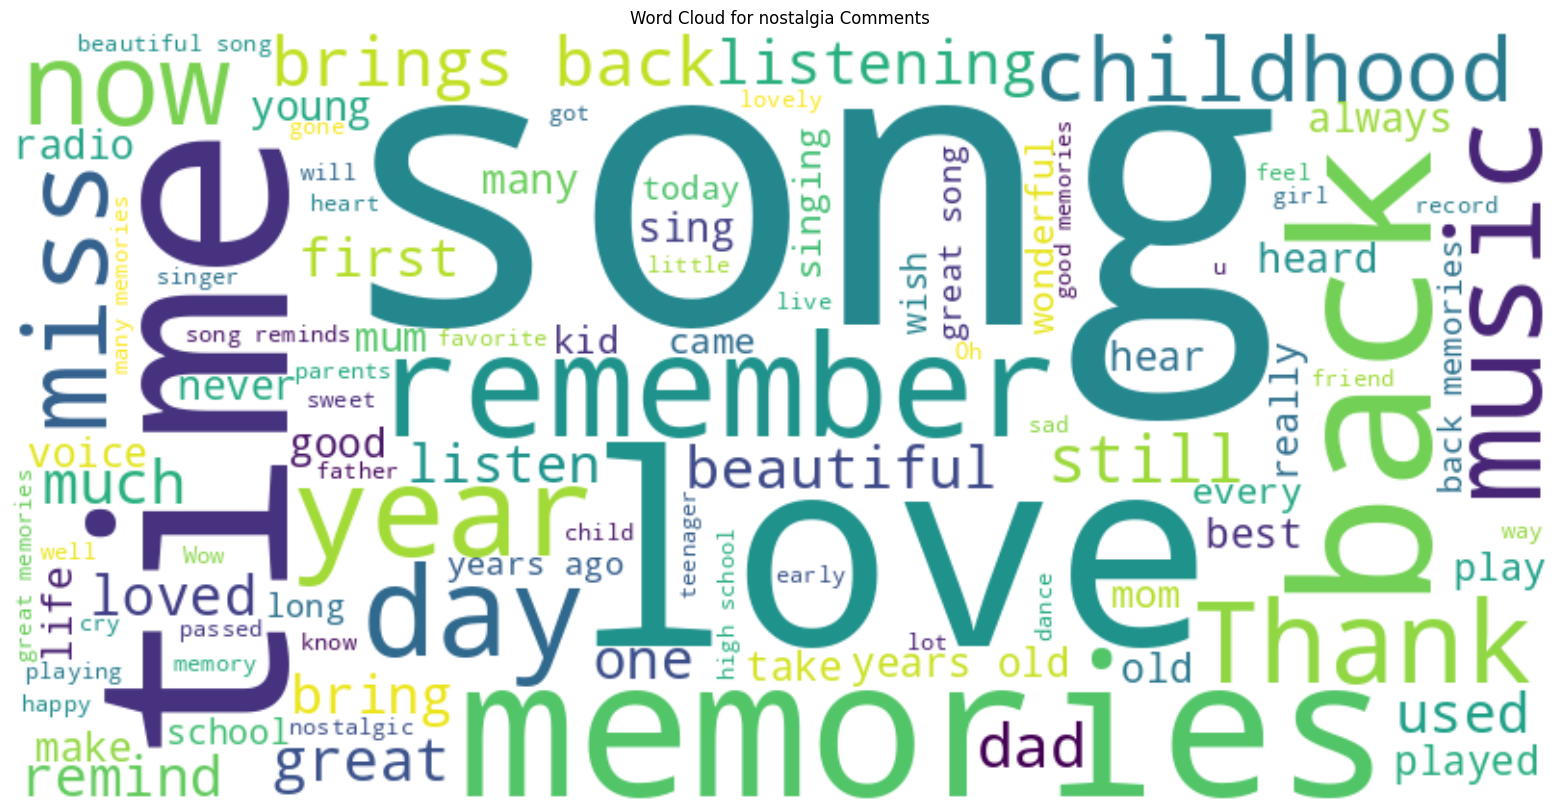

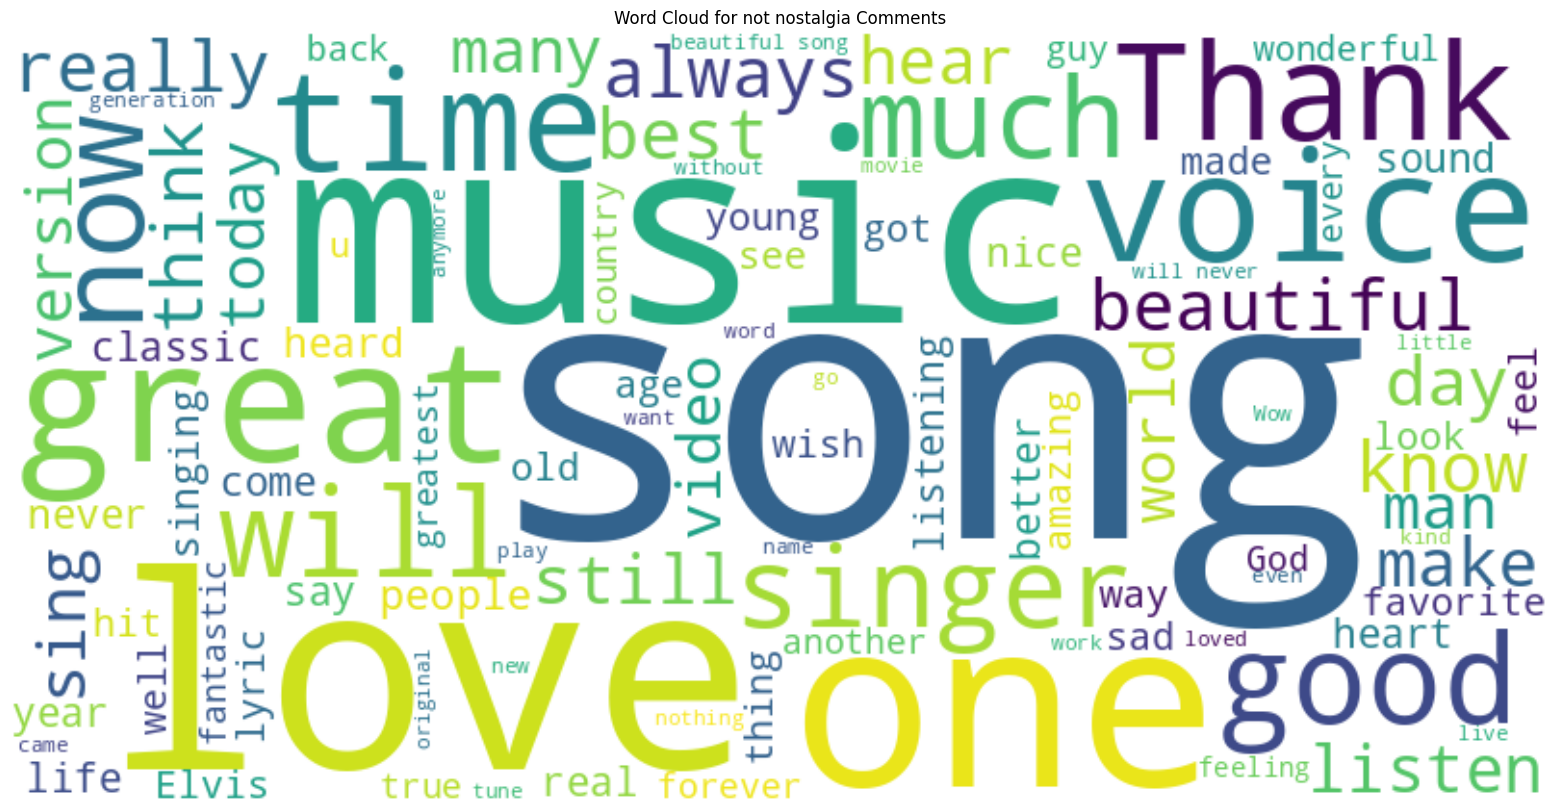

In [47]:
# Word cloud visualization (by sentiment category)

from wordcloud import WordCloud

# Remove Stop Words
stop_words = set(stopwords.words('english'))

def get_word_counts(text_series):
    words = ' '.join(text_series).lower()
    words = re.findall(r'\w+', words)
    words = [word for word in words if word not in stop_words]
    return Counter(words)

# Create Wordcloud
def create_wordcloud(sentiment):
    # Combine all text from the sentiment category
    text = ' '.join(X[X['category_name'] == sentiment]['text'])

    # Create and generate a word cloud image
    wordcloud = WordCloud(width=800, height=400,
                         background_color='white',
                         max_words=100).generate(text)

    # Display image
    plt.figure(figsize=(20,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Comments')
    plt.show()

create_wordcloud('nostalgia')
create_wordcloud('not nostalgia')

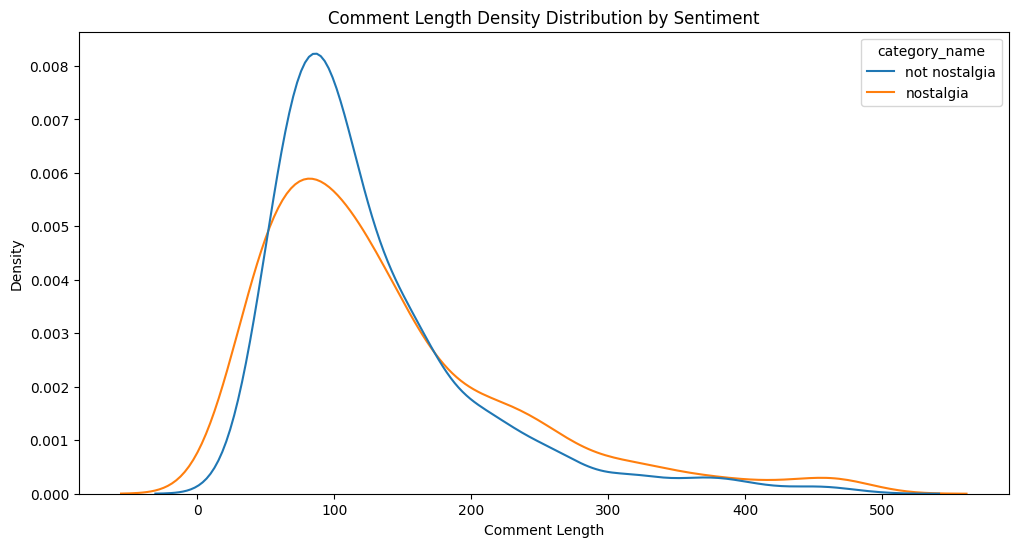

In [34]:
# Density plot of comment length distribution

# Remove Stop Words
stop_words = set(stopwords.words('english'))

def get_word_counts(text_series):
    words = ' '.join(text_series).lower()
    words = re.findall(r'\w+', words)
    words = [word for word in words if word not in stop_words]
    return Counter(words)

plt.figure(figsize=(12, 6))
sns.kdeplot(data=X, x='comment_length', hue='category_name', common_norm=False)
plt.title('Comment Length Density Distribution by Sentiment')
plt.xlabel('Comment Length')
plt.ylabel('Density')
plt.show()

<Figure size 1500x800 with 0 Axes>

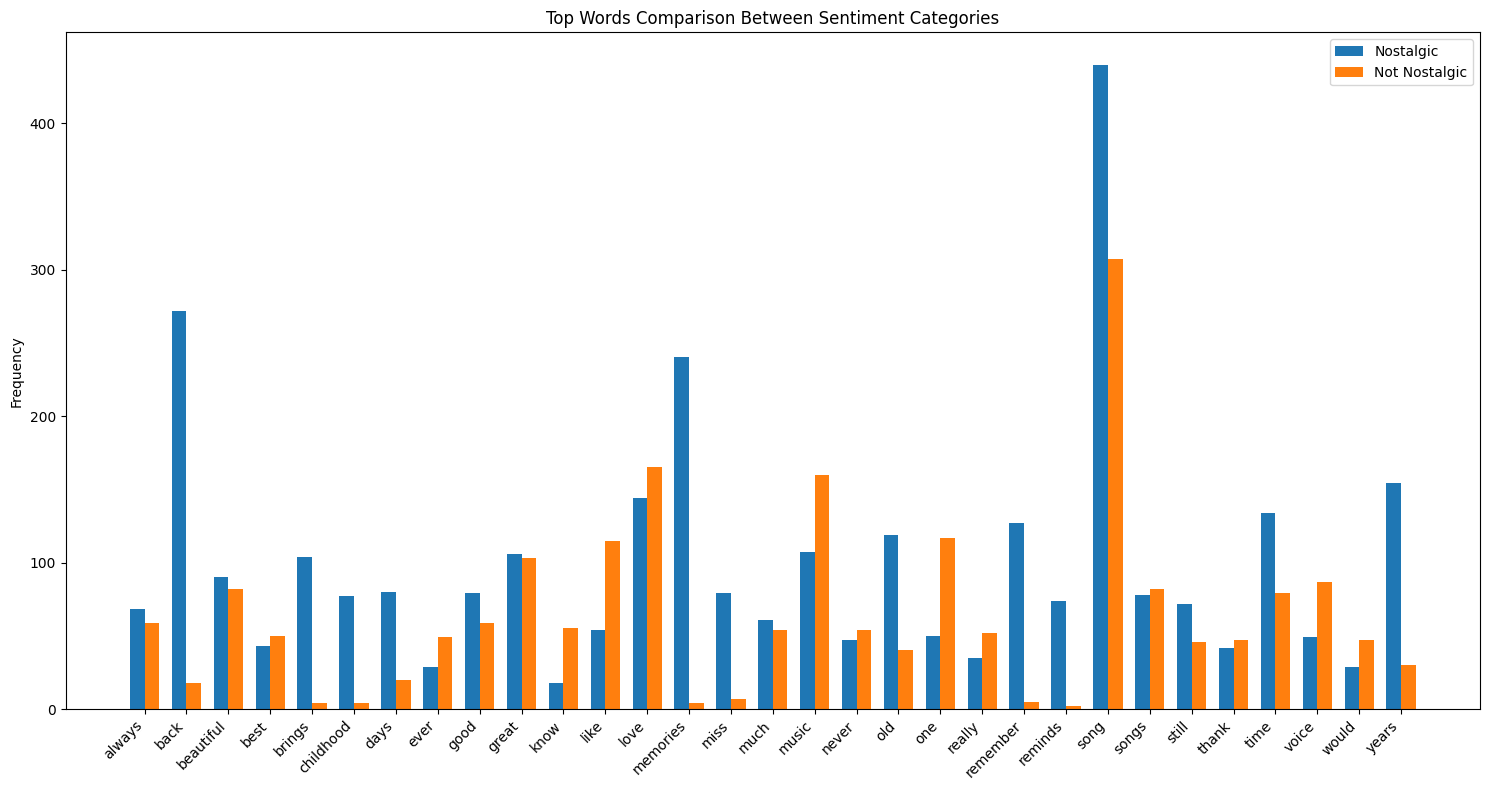

In [33]:
# Sentiment distribution of common words

from collections import Counter
import re
from nltk.corpus import stopwords

# Remove Stop Words
stop_words = set(stopwords.words('english'))

def get_word_counts(text_series):
    words = ' '.join(text_series).lower()
    words = re.findall(r'\w+', words)
    words = [word for word in words if word not in stop_words]
    return Counter(words)


nostalgic_words = get_word_counts(X[X['category_name'] == 'nostalgia']['text'])
not_nostalgic_words = get_word_counts(X[X['category_name'] == 'not nostalgia']['text'])

# Plot semtiment distribution
def plot_word_comparison(nostalgic_words, not_nostalgic_words, top_n=20):
    plt.figure(figsize=(15, 8))

    # Get top N words of both categories
    words = set()
    for word, _ in nostalgic_words.most_common(top_n):
        words.add(word)
    for word, _ in not_nostalgic_words.most_common(top_n):
        words.add(word)

    # Create comparative data
    words = sorted(words)
    nostalgic_counts = [nostalgic_words[word] for word in words]
    not_nostalgic_counts = [not_nostalgic_words[word] for word in words]

    # Bar chart
    x = np.arange(len(words))
    width = 0.35

    fig, ax = plt.subplots(figsize=(15, 8))
    ax.bar(x - width/2, nostalgic_counts, width, label='Nostalgic')
    ax.bar(x + width/2, not_nostalgic_counts, width, label='Not Nostalgic')

    ax.set_ylabel('Frequency')
    ax.set_title('Top Words Comparison Between Sentiment Categories')
    ax.set_xticks(x)
    ax.set_xticklabels(words, rotation=45, ha='right')
    ax.legend()

    plt.tight_layout()
    plt.show()

plot_word_comparison(nostalgic_words, not_nostalgic_words)


### 2. Generate TF-IDF features from the tokens of each text

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd

# Initialize TF-IDF Vectorizer with similar preprocessing as before
tfidf_vectorizer = TfidfVectorizer(
    stop_words='english',          # Remove English stop words
    min_df=5,                      # Remove terms in less than 5 documents
    max_df=0.95,                   # Remove terms in more than 95% of documents
    token_pattern=r'\b\w+\b',      # Match word boundaries
    lowercase=True                  # Convert all text to lowercase
)

# TF-IDF features
X_tfidf = tfidf_vectorizer.fit_transform(X['text'])

# Print information about the matrix
print("TF-IDF matrix shape:", X_tfidf.shape)
print("Number of terms:", len(tfidf_vectorizer.get_feature_names_out()))

# Get feature
feature_names = tfidf_vectorizer.get_feature_names_out()

# Compare with previous Count Vectorizer results
print("\nComparison with Count Vectorizer:")
print("TF-IDF features:", X_tfidf.shape[1])
print("Count features:", X_counts.shape[1])

TF-IDF matrix shape: (1498, 1475)
Number of terms: 1475

Comparison with Count Vectorizer:
TF-IDF features: 1475
Count features: 3730



Top 20 terms by average TF-IDF value:
           term  avg_tfidf
1197       song   0.063494
807        love   0.037676
854    memories   0.036150
893       music   0.032033
1103          s   0.031312
1322       time   0.027234
595       great   0.026631
183   beautiful   0.025602
1198      songs   0.022275
1466      years   0.022173
766        like   0.022030
927         old   0.020890
574        good   0.020367
1403      voice   0.020292
231      brings   0.020167
718        just   0.019725
1068   remember   0.018158
367        days   0.017725
1274          t   0.017293
284   childhood   0.016977


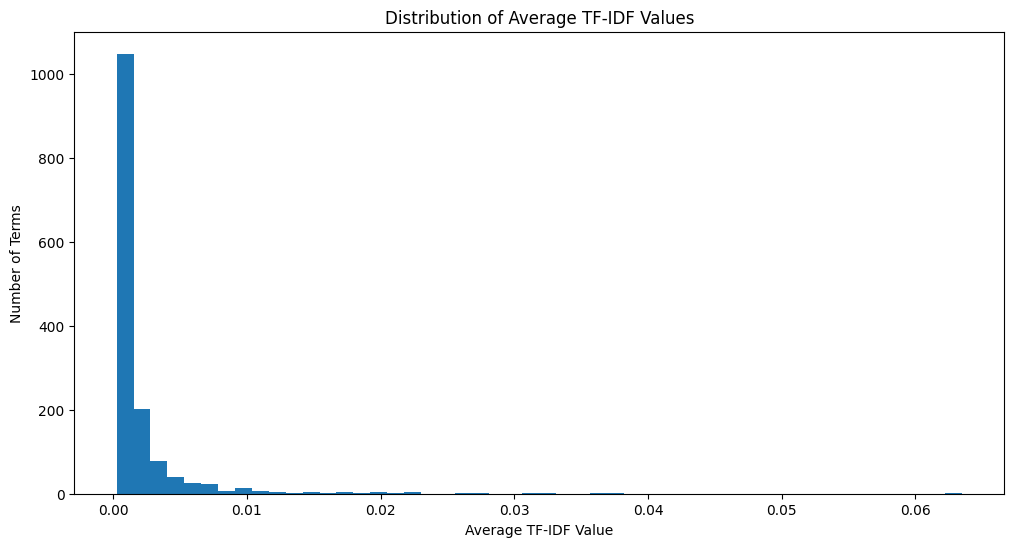

In [37]:
# Get average TF-IDF values for each term
avg_tfidf = np.array(X_tfidf.mean(axis=0)).flatten()

# Create DataFrame with terms and their average TF-IDF values
tfidf_scores = pd.DataFrame({
    'term': feature_names,
    'avg_tfidf': avg_tfidf
})

# Sort by average TF-IDF value
tfidf_scores = tfidf_scores.sort_values('avg_tfidf', ascending=False)

# Display top terms by TF-IDF value
print("\nTop 20 terms by average TF-IDF value:")
print(tfidf_scores.head(20))

# Visualize TF-IDF distribution
plt.figure(figsize=(12, 6))
plt.hist(avg_tfidf, bins=50)
plt.title('Distribution of Average TF-IDF Values')
plt.xlabel('Average TF-IDF Value')
plt.ylabel('Number of Terms')
plt.show()


Top terms with largest TF-IDF differences:
           term  nostalgic_tfidf  not_nostalgic_tfidf  tfidf_difference  \
854    memories         0.071450             0.000756          0.070694   
231      brings         0.039244             0.001038          0.038206   
1068   remember         0.034903             0.001369          0.033534   
284   childhood         0.032357             0.001554          0.030803   
1074    reminds         0.030804             0.000515          0.030290   
1466      years         0.036421             0.007886          0.028535   
868        miss         0.027833             0.002532          0.025301   
367        days         0.028941             0.006478          0.022463   
1197       song         0.074361             0.052597          0.021764   
351         dad         0.021853             0.001081          0.020771   
927         old         0.030675             0.011078          0.019597   
766        like         0.012592             0.031492   

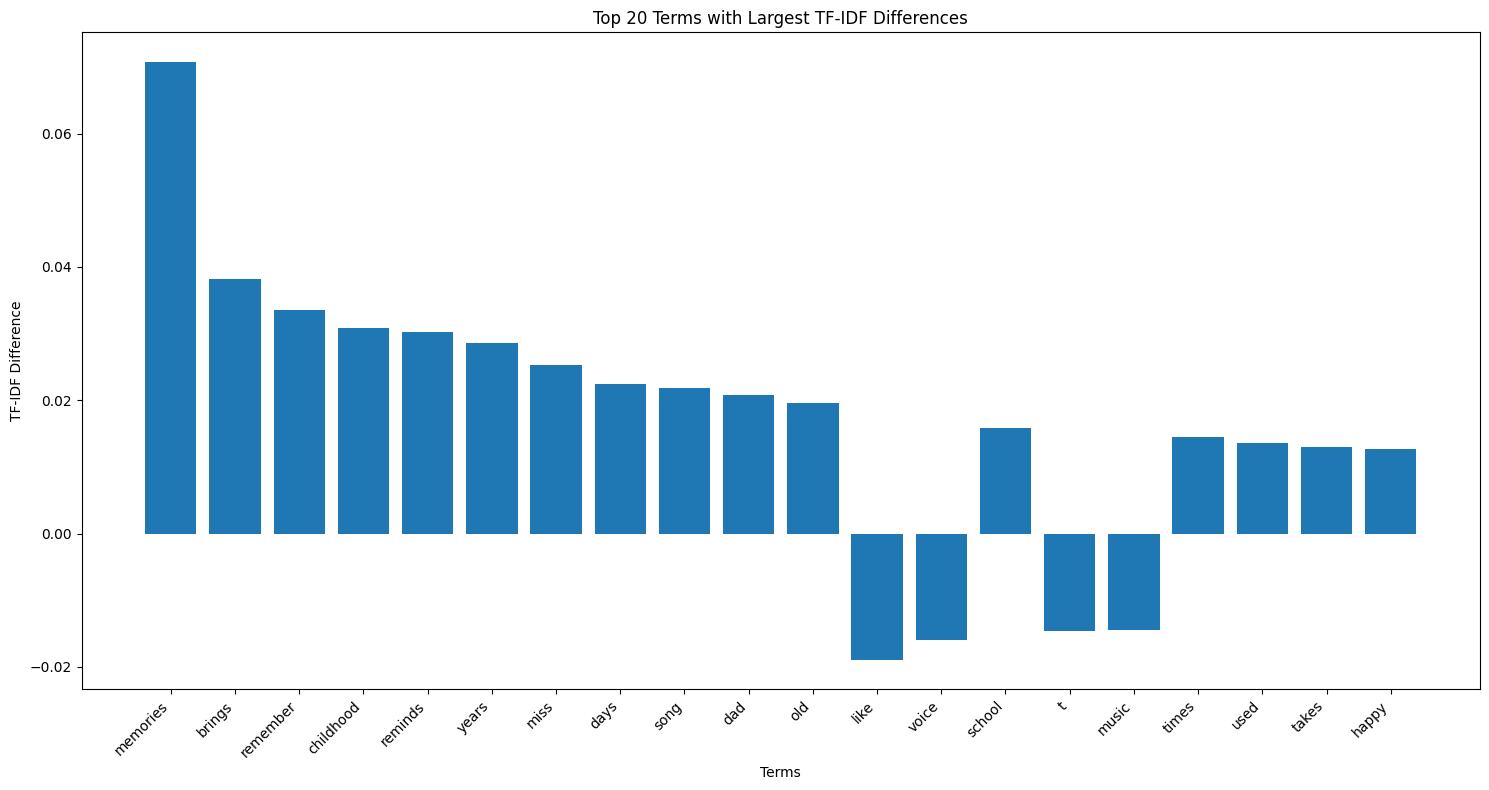

In [39]:
# Calculate average TF-IDF values for each category
def get_category_tfidf_averages(category):
    category_mask = X['category_name'] == category
    category_tfidf = X_tfidf[category_mask]
    return np.array(category_tfidf.mean(axis=0)).flatten()

nostalgic_tfidf = get_category_tfidf_averages('nostalgia')
not_nostalgic_tfidf = get_category_tfidf_averages('not nostalgia')

comparison_df = pd.DataFrame({
    'term': feature_names,
    'nostalgic_tfidf': nostalgic_tfidf,
    'not_nostalgic_tfidf': not_nostalgic_tfidf
})

# Calculate difference
comparison_df['tfidf_difference'] = comparison_df['nostalgic_tfidf'] - comparison_df['not_nostalgic_tfidf']

# Sort by absolute difference
comparison_df['abs_difference'] = abs(comparison_df['tfidf_difference'])
comparison_df = comparison_df.sort_values('abs_difference', ascending=False)

# Display terms with largest TF-IDF differences between categories
print("\nTop terms with largest TF-IDF differences:")
print(comparison_df.head(20))

# Visualize the differences
plt.figure(figsize=(15, 8))
plt.bar(range(20), comparison_df['tfidf_difference'].head(20))
plt.xticks(range(20), comparison_df['term'].head(20), rotation=45, ha='right')
plt.title('Top 20 Terms with Largest TF-IDF Differences')
plt.xlabel('Terms')
plt.ylabel('TF-IDF Difference')
plt.tight_layout()
plt.show()

The TF-IDF analysis reveals the most distinctive terms within the dataset, highlighting words like "song," "love," "memories," and "music," which have the highest average TF-IDF values. These terms likely appear frequently in nostalgic content but less so elsewhere, making them representative of the nostalgic theme. The distribution plot shows that most terms have low TF-IDF values, indicating common or less meaningful words across documents. The top terms emphasize themes of nostalgia, such as memories and childhood, providing valuable features for sentiment classification and helping to identify emotionally significant content.

###3. Implement a simple Naive Bayes classifier that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers.

Training MultinomialNB with Count Vector features...

Count Vector Features Results:

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.94      0.87       214
           1       0.94      0.79      0.86       236

    accuracy                           0.86       450
   macro avg       0.87      0.87      0.86       450
weighted avg       0.87      0.86      0.86       450



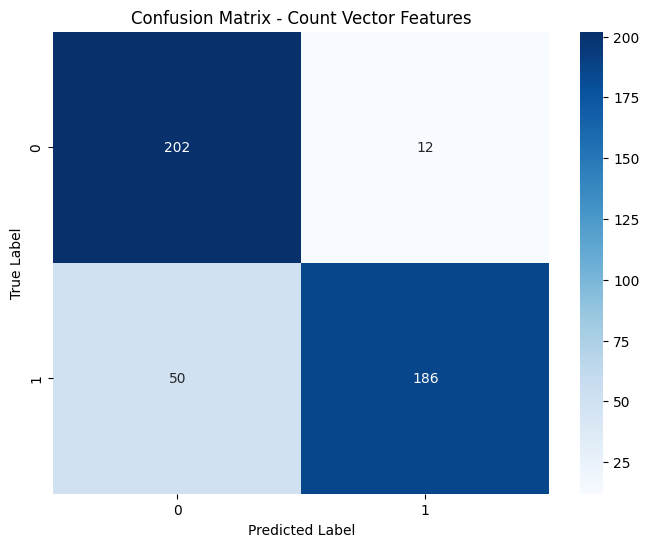


Training MultinomialNB with TF-IDF features...

TF-IDF Features Results:

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.96      0.86       214
           1       0.95      0.75      0.84       236

    accuracy                           0.85       450
   macro avg       0.87      0.86      0.85       450
weighted avg       0.87      0.85      0.85       450



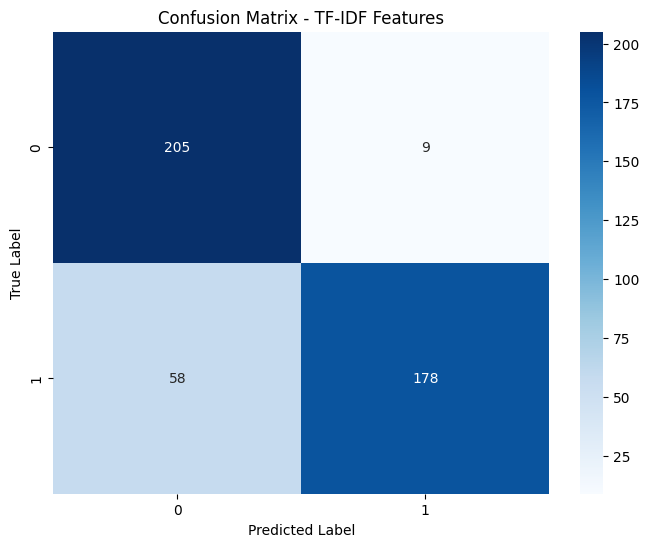

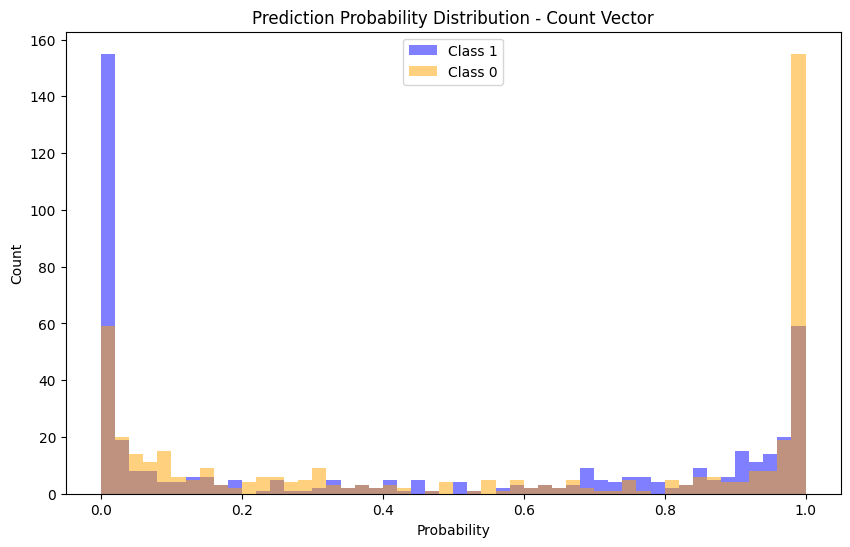

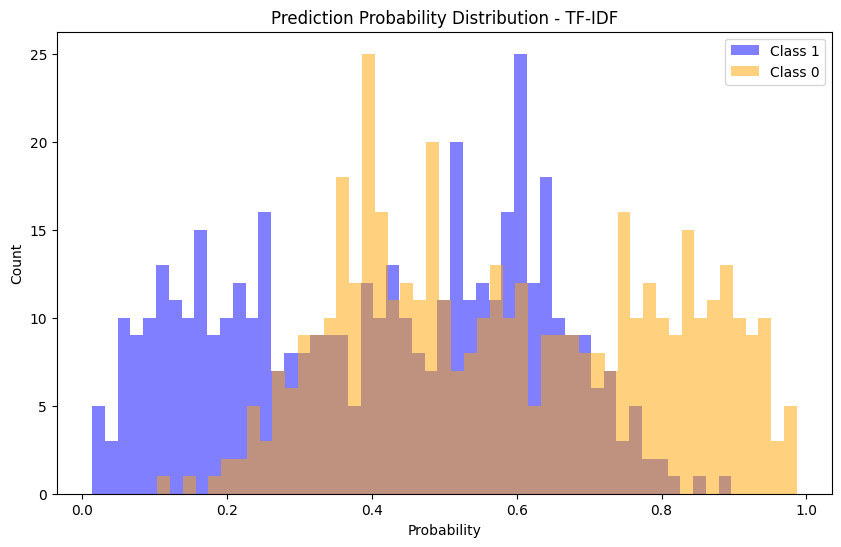


Top features for Count Vector:

not nostalgia:
song: -3.5410
back: -3.9856
memories: -4.1841
years: -4.5655
love: -4.6688
time: -4.7622
remember: -4.8066
old: -4.8651
great: -4.9019
music: -4.9532
brings: -4.9665
beautiful: -5.0355
miss: -5.2064
still: -5.2409
childhood: -5.2586
songs: -5.2586
reminds: -5.2766
good: -5.3137
always: -5.3137
days: -5.3327

nostalgia:
song: -3.8278
love: -4.3969
music: -4.5497
like: -4.8024
great: -4.8406
one: -4.8669
voice: -4.9948
beautiful: -5.1414
time: -5.1771
songs: -5.1771
always: -5.3343
good: -5.4708
best: -5.5735
know: -5.5735
still: -5.5735
really: -5.6009
never: -5.6009
much: -5.6291
ever: -5.6580
think: -5.7504

Top features for TF-IDF:

not nostalgia:
back: -4.9886
song: -4.9962
memories: -5.0762
brings: -5.5942
years: -5.6368
remember: -5.7460
childhood: -5.7654
love: -5.7672
reminds: -5.7877
time: -5.8105
beautiful: -5.8512
old: -5.8561
miss: -5.8633
great: -5.8942
days: -5.9950
dad: -6.0896
music: -6.1267
good: -6.1567
always: -6.2074
yo

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords

# Load English stopwords and convert to list
stop_words = list(stopwords.words('english'))

# Initialize CountVectorizer and TfidfVectorizer with stopwords removed
count_vect = CountVectorizer(stop_words=stop_words)
tfidf_vect = TfidfVectorizer(stop_words=stop_words)

# Transform text data into Count Vector and TF-IDF features
X_counts = count_vect.fit_transform(X['text'])
X_tfidf = tfidf_vect.fit_transform(X['text'])

# Define random state and test size for consistent splits
RANDOM_STATE = 42
TEST_SIZE = 0.3

# 1. Split data for Count Vector features
X_count_train, X_count_test, y_count_train, y_count_test = train_test_split(
    X_counts,
    X['category'],
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE
)

# 2. Split data for TF-IDF features
X_tfidf_train, X_tfidf_test, y_tfidf_train, y_tfidf_test = train_test_split(
    X_tfidf,
    X['category'],
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE
)

# Train and evaluate MultinomialNB model with Count Vector features
print("Training MultinomialNB with Count Vector features...")
nb_count = MultinomialNB()
nb_count.fit(X_count_train, y_count_train)
y_count_pred = nb_count.predict(X_count_test)

# Evaluate model performance for Count Vector features
print("\nCount Vector Features Results:")
print("\nClassification Report:")
print(classification_report(y_count_test, y_count_pred))

# Plot confusion matrix for Count Vector features
plt.figure(figsize=(8, 6))
cm_count = confusion_matrix(y_count_test, y_count_pred)
sns.heatmap(cm_count, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Count Vector Features')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Train and evaluate MultinomialNB model with TF-IDF features
print("\nTraining MultinomialNB with TF-IDF features...")
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_tfidf_train, y_tfidf_train)
y_tfidf_pred = nb_tfidf.predict(X_tfidf_test)

# Evaluate model performance for TF-IDF features
print("\nTF-IDF Features Results:")
print("\nClassification Report:")
print(classification_report(y_tfidf_test, y_tfidf_pred))

# Plot confusion matrix for TF-IDF features
plt.figure(figsize=(8, 6))
cm_tfidf = confusion_matrix(y_tfidf_test, y_tfidf_pred)
sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - TF-IDF Features')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Function to compare prediction probability distributions
def compare_probability_distributions(model, X_test, feature_type):
    probas = model.predict_proba(X_test)
    plt.figure(figsize=(10, 6))
    plt.hist(probas[:, 1], bins=50, alpha=0.5, color='blue', label='Class 1')
    plt.hist(probas[:, 0], bins=50, alpha=0.5, color='orange', label='Class 0')
    plt.title(f'Prediction Probability Distribution - {feature_type}')
    plt.xlabel('Probability')
    plt.ylabel('Count')
    plt.legend()
    plt.show()

# Compare distributions for Count Vector and TF-IDF features
compare_probability_distributions(nb_count, X_count_test, "Count Vector")
compare_probability_distributions(nb_tfidf, X_tfidf_test, "TF-IDF")

# Function to get top features for each class
def get_top_features(vectorizer, model, n_top=20):
    feature_names = vectorizer.get_feature_names_out()
    coef = model.feature_log_prob_

    # Get top features for each category
    top_features = []
    for i, category in enumerate(['not nostalgia', 'nostalgia']):
        top_indices = coef[i].argsort()[-n_top:][::-1]
        top_features.append({
            'category': category,
            'features': [(feature_names[j], coef[i][j]) for j in top_indices]
        })

    return top_features

# Retrieve and display top features for both models
count_top_features = get_top_features(count_vect, nb_count)
tfidf_top_features = get_top_features(tfidf_vect, nb_tfidf)

# Print top features for each feature type
for feature_set, title in [(count_top_features, "Count Vector"), (tfidf_top_features, "TF-IDF")]:
    print(f"\nTop features for {title}:")
    for category in feature_set:
        print(f"\n{category['category']}:")
        for feature, score in category['features']:
            print(f"{feature}: {score:.4f}")

In [46]:
# Compute and display performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# evaluate the performance of the models
def print_comparison_metrics(y_true_count, y_pred_count, y_true_tfidf, y_pred_tfidf):
    metrics = {
        'Accuracy': (accuracy_score(y_true_count, y_pred_count),
                    accuracy_score(y_true_tfidf, y_pred_tfidf)),
        'Precision': (precision_score(y_true_count, y_pred_count, average='weighted'),
                     precision_score(y_true_tfidf, y_pred_tfidf, average='weighted')),
        'Recall': (recall_score(y_true_count, y_pred_count, average='weighted'),
                  recall_score(y_true_tfidf, y_pred_tfidf, average='weighted')),
        'F1-score': (f1_score(y_true_count, y_pred_count, average='weighted'),
                    f1_score(y_true_tfidf, y_pred_tfidf, average='weighted'))
    }

    print("\nPerformance Comparison:")
    print(f"{'Metric':<15} {'Count Vector':<15} {'TF-IDF':<15} {'Difference':<15}")
    print("-" * 60)
    for metric, (count_score, tfidf_score) in metrics.items():
        diff = tfidf_score - count_score
        print(f"{metric:<15} {count_score:.4f}        {tfidf_score:.4f}        {diff:+.4f}")

print_comparison_metrics(y_count_test, y_count_pred, y_tfidf_test, y_tfidf_pred)


Performance Comparison:
Metric          Count Vector    TF-IDF          Difference     
------------------------------------------------------------
Accuracy        0.8622        0.8511        -0.0111
Precision       0.8739        0.8699        -0.0040
Recall          0.8622        0.8511        -0.0111
F1-score        0.8618        0.8501        -0.0117


### Interpretation

1. **Accuracy**:
   - The accuracy for Count Vector is 0.8622, a little bit higher than TF-IDF 0.8511, indicating Count Vector performs slightly better in accuracy, with a small difference of -0.0111.

2. **Precision**:
   - Count Vector precision is 0.8739, a little bit higher than TF-IDF 0.8699. This suggests that Count Vector features is a bit more precise in correctly identifying the positive class.

3. **Recall**:
   - The recall for Count Vector is 0.8622, again a little bit higher than TF-IDF at 0.8511, with a difference of -0.0111. This means the Count Vector model captures the correct classifications a bit well.

4. **F1-score**:
   - The F1-score for Count Vector is 0.8618, compared to TF-IDF’s 0.8501, with a difference of -0.0117. This indicates that the Count Vector model has a slight edge in balancing precision and recall.

### Missing Value Improvement

**Main Problem**:
the current method is too simple, if directly remove the missing values will be lost valuable.

**Suggestions**:
- For YouTube comments, implement context-based filling
- Consider similar comment patterns
- Employ advanced missing value prediction models

---

### Text Preprocessing Improvement

**Suggestions**:
- Include emojis in processing
- Handle URL and special characters
- Take "internet slang", abbreviations into consideration
- Implement spell correction

---

### Feature Engineering Improvement

**Suggestions**:
- Sentiment intensity scores should be added
- POS features can also help in building the model better.
- Word embedding technique could get implemented as well
- Add some text statistics like length and punctuation etc.

---

### Classification Model Improvement

**Suggestions**:
- Try out ensemble learning methods
- Try deep learning models
- Apply cross-validation for better model evaluation
